In [1]:
import torch
from torch import nn
from torch.utils.data import Subset, DataLoader
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torchvision import utils
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns
import pandas as pd

# torch.cuda.get_device_name(0)
print(torch.version.cuda)
# print(torch.cuda.is_available())
Device = "cuda" if torch.cuda.is_available() else "cpu"
# Device = "cpu"
print(Device)

print(torch.version.cuda)



11.7
cuda
11.7


In [2]:
# %pip install pytorch-metric-learning
# %pip install faiss-gpu

In [3]:
import tarfile
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
from pydicom import dcmread
from PIL import Image
import matplotlib.pyplot as plt
# from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Set the seed for PyTorch
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)


In [4]:
L_data = pd.read_csv('/home/shrivastavaayush/VS_dir/Nav/Dataset2/stage_2_train_labels.csv')
print(L_data)


                                  patientId      x      y  width  height  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN   
2      00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN   
4      00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   
...                                     ...    ...    ...    ...     ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba    NaN    NaN    NaN     NaN   
30224  c1f6b555-2eb1-4231-98f6-50a963976431    NaN    NaN    NaN     NaN   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target  
0           0  
1           0  
2           0  
3           0  
4      

In [5]:
L_data.head(5)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [6]:
L_data = L_data.filter(['patientId','Target'])
print(L_data)

                                  patientId  Target
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6       0
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd       0
2      00322d4d-1c29-4943-afc9-b6754be640eb       0
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5       0
4      00436515-870c-4b36-a041-de91049b9ab4       1
...                                     ...     ...
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8       1
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba       0
30224  c1f6b555-2eb1-4231-98f6-50a963976431       0
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a       1
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a       1

[30227 rows x 2 columns]


In [7]:
x = L_data['Target'].value_counts()
print(x)

Target
0    20672
1     9555
Name: count, dtype: int64


In [8]:
# labels = L_data.drop_duplicates("patientId")
labels = L_data

In [9]:
x = labels['Target'].value_counts()
print(x)

Target
0    20672
1     9555
Name: count, dtype: int64


In [10]:
label_0_sampled = L_data[L_data['Target'] == 0].sample(n=9555, replace=False,random_state=42)

# Selecting all samples from label 1 dataset
label_1 = L_data[L_data['Target'] == 1]

# Concatenating the sampled label 0 dataset with the label 1 dataset
balanced_data = pd.concat([label_0_sampled, label_1])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1,random_state=42).reset_index(drop=True)

# Check the distribution of the target labels
print(balanced_data['Target'].value_counts())
print(balanced_data)

Target
0    9555
1    9555
Name: count, dtype: int64
                                  patientId  Target
0      38adcca4-6486-4169-ad60-07f8dec4e11a       0
1      ce2c3633-e469-4078-9c51-fb6184c36bc5       0
2      ada57dae-a677-4d5e-a9b5-1143893e9154       1
3      93c3cc21-67cb-44e7-bf5f-483c9168a52b       0
4      9e658fac-3d66-46eb-b991-2e7f8b89e0c8       0
...                                     ...     ...
19105  39a5e461-791e-45f0-a4a9-2f4d06c8eca8       1
19106  45e92e87-9e8e-4783-ba97-c032c17864da       1
19107  58d71b03-41d0-4009-aa4f-e192589dd41e       0
19108  b6744d49-d49b-47c1-b006-0a1256e83452       0
19109  b38cc4d8-f90d-4052-843b-675a43417c82       1

[19110 rows x 2 columns]


In [11]:
trn_labl1 , test_labl = train_test_split(balanced_data, test_size= 0.1,random_state=42)
print(trn_labl1.shape)
print(test_labl.shape)

(17199, 2)
(1911, 2)


In [12]:
trn_labl , val_labl = train_test_split(trn_labl1, test_size= 0.11106,random_state=42)
print(trn_labl.shape)
print(val_labl.shape)
print(test_labl.shape)

(15288, 2)
(1911, 2)
(1911, 2)


In [13]:
x = trn_labl['Target'].value_counts()
print(x)

Target
1    7667
0    7621
Name: count, dtype: int64


In [14]:
# x = trn_labl['Target'][:500].value_counts()
# print(x)

# Dataset CLASS

In [15]:
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        
        image = dcmread(self.image_paths[idx])
        image = image.pixel_array
        image = image / 255.0

        image = (255*image).clip(0, 255).astype(np.uint8)
        image = Image.fromarray(image).convert('RGB')

        label = self.labels[idx]
        
        if self.transform is not None:
            image = self.transform(image)
        return image, label, self.image_paths[idx]

    def add_selected_images(self, selected_images):
        for prob, label, path_tuple in selected_images:
            path = path_tuple  # Extract the file path from the tuple
            self.image_paths.append(path)
            self.labels.append(label)

    def remove_selected_images(self, selected_images):
        for prob, label, path in selected_images:
            indices_to_remove = [i for i, p in enumerate(self.image_paths) if p in path]
            self.image_paths = [p for i, p in enumerate(self.image_paths) if i not in indices_to_remove]
            self.labels = [l for i, l in enumerate(self.labels) if i not in indices_to_remove]


# Define data transformations
transform = transforms.Compose( [  transforms.Resize((224, 224)),   #must same as here
    # transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(), # data augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    # ,transforms.Grayscale(num_output_channels=1)    
])

# Create data loaders
# train_dataset = CustomDataset(["/DATAHDD/chailex/navneet_thesis/CXR8/CXR8/images1/images/" + img for img in train_data["Image Index"].values],
#                               train_data["Finding Labels"].values, transform)
train_dataset = CustomDataset(["/home/shrivastavaayush/VS_dir/Nav/Dataset2/stage_2_train_images/" + img for img in trn_labl["patientId"].values + ".dcm"],
                              trn_labl["Target"].values, transform)
val_dataset = CustomDataset(["/home/shrivastavaayush/VS_dir/Nav/Dataset2/stage_2_train_images/" + img for img in val_labl["patientId"].values + ".dcm"],
                             val_labl["Target"].values, transform)
test_dataset = CustomDataset(["/home/shrivastavaayush/VS_dir/Nav/Dataset2/stage_2_train_images/" + img for img in test_labl["patientId"].values + ".dcm"],
                             test_labl["Target"].values, transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle= False)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle= False)

In [16]:
# for i in range(4):
#     sample = train_dataset[i]
#     image, label = sample  # Unpack the tuple
#     print(f"Data sample {i+1}:")
#     print("Image shape:", image.shape)  # Assuming image is a tensor
#     print("Label:", label)

In [17]:
# Create subset1 with indices ranging from 0 to 999
subset1_indices = range(100)
subset1 = CustomDataset([train_dataset.image_paths[i] for i in subset1_indices],
                        [train_dataset.labels[i] for i in subset1_indices],
                        transform=transform)
subset_train_loader = DataLoader(subset1, batch_size=128, shuffle=True)

# Create subset2 with indices ranging from 1000 to the end
subset2_indices = range(100, len(train_dataset))
# subset2_indices = range(1000, 1500)
subset2 = CustomDataset([train_dataset.image_paths[i] for i in subset2_indices],
                        [train_dataset.labels[i] for i in subset2_indices],
                        transform=transform)
remaining_train_loader = DataLoader(subset2, batch_size=128, shuffle=True)

In [18]:
temp_dataset = CustomDataset([], [], transform)  # Create an empty dataset
temp_loader = DataLoader(temp_dataset, batch_size=32, shuffle=False)  # Create the data loader

In [19]:
temp_dataset_size = len(temp_dataset)
print("Size of temp_dataset:", temp_dataset_size)

Size of temp_dataset: 0


In [20]:
trn_labl["patientId"].values

array(['cf0c675d-fb78-462b-b17d-9a41f0b7c6b1',
       '4ce02de9-83ad-4754-b60f-ad9662ba2bcb',
       '31bef3ba-3580-40ab-a7af-567a5c95e4da', ...,
       '0ccff729-ee71-4a5f-ad01-ce12ab162afa',
       '35ce8c4b-7dbc-49ae-b141-ee593aa2180e',
       'c5d83772-02ee-43f9-a2a1-b96d53755ab6'], dtype=object)

# Training

# SGD2

In [21]:
def get_model(classification):
    # model = models.vit_b_16(weights= models.ViT_B_16_Weights.DEFAULT)
    model = models.resnet18(pretrained=True)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 2)
    model = model.to(Device)

    # last_layer_name, last_layer = list(model.named_modules())[-1]
    # if isinstance(last_layer, nn.Linear):
    #     last_layer.out_features = 2
    return model
# print(get_model(2).to(0)(torch.randn(1,3,224,224).to(0)).shape)

# Final 2


************Iteration Number 0****************
Number of images in dataset1: 100
Number of images in dataset2: 15188


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.7701, Training Accuracy: 52.00%, Training F1 Score: 0.4652
Epoch [1/30], Val_acc: 49.50%, Validation F1 Score: 0.3339
Saved model with best validation accuracy: 49.50%
Epoch [2/30], Loss: 0.7295, Training Accuracy: 48.00%, Training F1 Score: 0.4423
Epoch [2/30], Val_acc: 49.87%, Validation F1 Score: 0.3554
Saved model with best validation accuracy: 49.87%
Epoch [3/30], Loss: 0.7007, Training Accuracy: 52.00%, Training F1 Score: 0.5183
Epoch [3/30], Val_acc: 51.39%, Validation F1 Score: 0.4202
Saved model with best validation accuracy: 51.39%
Epoch [4/30], Loss: 0.6927, Training Accuracy: 54.00%, Training F1 Score: 0.5246
Epoch [4/30], Val_acc: 53.90%, Validation F1 Score: 0.5024
Saved model with best validation accuracy: 53.90%
Epoch [5/30], Loss: 0.6612, Training Accuracy: 61.00%, Training F1 Score: 0.5623
Epoch [5/30], Val_acc: 56.15%, Validation F1 Score: 0.5518
Saved model with best validation accuracy: 56.15%
Epoch [6/30], Loss: 0.6349, Trai

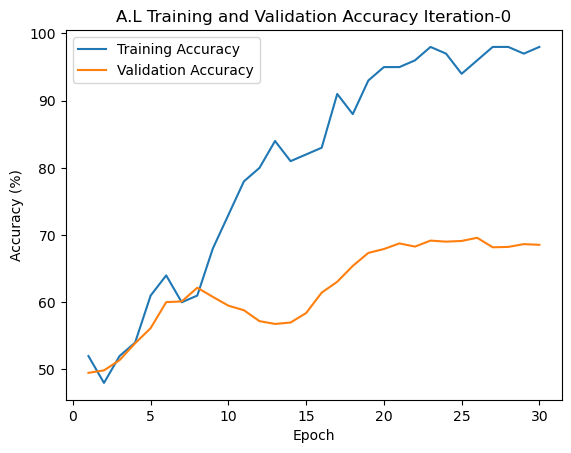

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 68.47%, POOL data F1 Score: 0.6756


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 69.49241234955521%
Test F1 Score: 0.7343963553530752
Saved model with best Test accuracy: 69.49%

************Iteration Number 1****************
Number of images in dataset1: 140
Number of images in dataset2: 15143
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7436, Training Accuracy: 52.86%, Training F1 Score: 0.3458
Epoch [1/30], Val_acc: 51.07%, Validation F1 Score: 0.3656
Saved model with best validation accuracy: 51.07%
Epoch [2/30], Loss: 0.5504, Training Accuracy: 56.43%, Training F1 Score: 0.4914
Epoch [2/30], Val_acc: 55.57%, Validation F1 Score: 0.4873
Saved model with best validation accuracy: 55.57%
Epoch [3/30], Loss: 0.5006, Training Accuracy: 65.00%, Training F1 Score: 0.6294
Epoch [3/30], Val_acc: 58.56%, Validation F1 Score: 0.5430
Saved model with best validation accuracy: 58.56%
Epoch [4/30], Loss: 0.6321, Training Accuracy: 67.14%, Training F1 Score: 0.6533
Epoch [4/30], Val_acc: 59.92%, Validation F1 Score: 0.5696
Saved model with best validation accuracy: 59.92%
Epoch [5/30], Loss: 0.5729, Training Accuracy: 75.00%, Training F1 Score: 0.7403
Epoch [5/30], Val_acc: 64.15%, Validation F1 Score: 0.6336
Saved model with best validation accuracy: 64.15%
Epoch [6/30], Loss: 0.5001, Training Accuracy: 71.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 73.37%, POOL data F1 Score: 0.7337


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 75.14390371533229%
Test F1 Score: 0.7442110931610123
Saved model with best Test accuracy: 75.14%

************Iteration Number 2****************
Number of images in dataset1: 180
Number of images in dataset2: 15095
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7870, Training Accuracy: 56.67%, Training F1 Score: 0.4042
Epoch [1/30], Val_acc: 49.76%, Validation F1 Score: 0.3589
Saved model with best validation accuracy: 49.76%
Epoch [2/30], Loss: 0.6914, Training Accuracy: 55.56%, Training F1 Score: 0.4764
Epoch [2/30], Val_acc: 53.53%, Validation F1 Score: 0.5218
Saved model with best validation accuracy: 53.53%
Epoch [3/30], Loss: 0.6725, Training Accuracy: 63.89%, Training F1 Score: 0.6388
Epoch [3/30], Val_acc: 56.99%, Validation F1 Score: 0.5664
Saved model with best validation accuracy: 56.99%
Epoch [4/30], Loss: 0.5898, Training Accuracy: 62.22%, Training F1 Score: 0.6114
Epoch [4/30], Val_acc: 59.03%, Validation F1 Score: 0.5878
Saved model with best validation accuracy: 59.03%
Epoch [5/30], Loss: 0.5661, Training Accuracy: 66.11%, Training F1 Score: 0.6598
Epoch [5/30], Val_acc: 56.62%, Validation F1 Score: 0.5163
Epoch [6/30], Loss: 0.5357, Training Accuracy: 75.00%, Training F1 Score: 0.7451
Epoch [6/30], Val_a

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 73.69%, POOL data F1 Score: 0.7368


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 74.35897435897436%
Test F1 Score: 0.731359649122807

************Iteration Number 3****************
Number of images in dataset1: 220
Number of images in dataset2: 15050
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.8348, Training Accuracy: 51.82%, Training F1 Score: 0.3413
Epoch [1/30], Val_acc: 49.40%, Validation F1 Score: 0.4542
Saved model with best validation accuracy: 49.40%
Epoch [2/30], Loss: 0.6775, Training Accuracy: 50.45%, Training F1 Score: 0.4312
Epoch [2/30], Val_acc: 49.82%, Validation F1 Score: 0.4188
Saved model with best validation accuracy: 49.82%
Epoch [3/30], Loss: 0.7321, Training Accuracy: 53.64%, Training F1 Score: 0.5152
Epoch [3/30], Val_acc: 50.08%, Validation F1 Score: 0.3589
Saved model with best validation accuracy: 50.08%
Epoch [4/30], Loss: 0.7652, Training Accuracy: 53.18%, Training F1 Score: 0.4625
Epoch [4/30], Val_acc: 52.38%, Validation F1 Score: 0.4235
Saved model with best validation accuracy: 52.38%
Epoch [5/30], Loss: 0.6198, Training Accuracy: 63.18%, Training F1 Score: 0.6142
Epoch [5/30], Val_acc: 61.59%, Validation F1 Score: 0.6131
Saved model with best validation accuracy: 61.59%
Epoch [6/30], Loss: 0.6090, Training Accuracy: 65.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 73.57%, POOL data F1 Score: 0.7353


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 74.20198848770278%
Test F1 Score: 0.7262631871182677

************Iteration Number 4****************
Number of images in dataset1: 260
Number of images in dataset2: 15003


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.8443, Training Accuracy: 51.54%, Training F1 Score: 0.3538
Epoch [1/30], Val_acc: 52.33%, Validation F1 Score: 0.3994
Saved model with best validation accuracy: 52.33%
Epoch [2/30], Loss: 0.8082, Training Accuracy: 55.38%, Training F1 Score: 0.5522
Epoch [2/30], Val_acc: 50.18%, Validation F1 Score: 0.3341
Epoch [3/30], Loss: 0.8433, Training Accuracy: 53.08%, Training F1 Score: 0.4602
Epoch [3/30], Val_acc: 52.69%, Validation F1 Score: 0.4058
Saved model with best validation accuracy: 52.69%
Epoch [4/30], Loss: 0.8265, Training Accuracy: 62.69%, Training F1 Score: 0.6183
Epoch [4/30], Val_acc: 63.89%, Validation F1 Score: 0.6221
Saved model with best validation accuracy: 63.89%
Epoch [5/30], Loss: 0.4970, Training Accuracy: 65.77%, Training F1 Score: 0.6481
Epoch [5/30], Val_acc: 61.28%, Validation F1 Score: 0.5785
Epoch [6/30], Loss: 0.4061, Training Accuracy: 66.92%, Training F1 Score: 0.6683
Epoch [6/30], Val_acc: 67.77%, Validation F1 Score:

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 75.18%, POOL data F1 Score: 0.7518


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 74.04500261643119%
Test F1 Score: 0.7422037422037422

************Iteration Number 5****************
Number of images in dataset1: 300
Number of images in dataset2: 14955
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7440, Training Accuracy: 48.67%, Training F1 Score: 0.3587
Epoch [1/30], Val_acc: 48.61%, Validation F1 Score: 0.4702
Saved model with best validation accuracy: 48.61%
Epoch [2/30], Loss: 0.8133, Training Accuracy: 49.67%, Training F1 Score: 0.4880
Epoch [2/30], Val_acc: 51.39%, Validation F1 Score: 0.3875
Saved model with best validation accuracy: 51.39%
Epoch [3/30], Loss: 0.6629, Training Accuracy: 52.67%, Training F1 Score: 0.3949
Epoch [3/30], Val_acc: 59.29%, Validation F1 Score: 0.5605
Saved model with best validation accuracy: 59.29%
Epoch [4/30], Loss: 0.6400, Training Accuracy: 62.67%, Training F1 Score: 0.6142
Epoch [4/30], Val_acc: 66.09%, Validation F1 Score: 0.6563
Saved model with best validation accuracy: 66.09%
Epoch [5/30], Loss: 0.6894, Training Accuracy: 67.33%, Training F1 Score: 0.6556
Epoch [5/30], Val_acc: 65.52%, Validation F1 Score: 0.6447
Epoch [6/30], Loss: 0.5484, Training Accuracy: 72.33%, Training F1 Score: 0.7181
Epoch [6/30], Val_a

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 74.91%, POOL data F1 Score: 0.7489


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 75.56253270538984%
Test F1 Score: 0.7598971722365038
Saved model with best Test accuracy: 75.56%

************Iteration Number 6****************
Number of images in dataset1: 340
Number of images in dataset2: 14910
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7044, Training Accuracy: 50.00%, Training F1 Score: 0.4174
Epoch [1/30], Val_acc: 49.29%, Validation F1 Score: 0.3826
Saved model with best validation accuracy: 49.29%
Epoch [2/30], Loss: 0.7051, Training Accuracy: 52.94%, Training F1 Score: 0.4988
Epoch [2/30], Val_acc: 48.46%, Validation F1 Score: 0.4703
Epoch [3/30], Loss: 0.7008, Training Accuracy: 54.71%, Training F1 Score: 0.4376
Epoch [3/30], Val_acc: 52.96%, Validation F1 Score: 0.5242
Saved model with best validation accuracy: 52.96%
Epoch [4/30], Loss: 0.6225, Training Accuracy: 65.29%, Training F1 Score: 0.6446
Epoch [4/30], Val_acc: 54.32%, Validation F1 Score: 0.4413
Saved model with best validation accuracy: 54.32%
Epoch [5/30], Loss: 0.5939, Training Accuracy: 63.82%, Training F1 Score: 0.6176
Epoch [5/30], Val_acc: 56.36%, Validation F1 Score: 0.4893
Saved model with best validation accuracy: 56.36%
Epoch [6/30], Loss: 0.5953, Training Accuracy: 68.82%, Training F1 Score: 0.6869
Epoch [6/30], Val_a

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 75.84%, POOL data F1 Score: 0.7583


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 75.40554683411827%
Test F1 Score: 0.7453954496208016

************Iteration Number 7****************
Number of images in dataset1: 380
Number of images in dataset2: 14861
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7315, Training Accuracy: 49.47%, Training F1 Score: 0.4521
Epoch [1/30], Val_acc: 49.40%, Validation F1 Score: 0.4925
Saved model with best validation accuracy: 49.40%
Epoch [2/30], Loss: 0.7203, Training Accuracy: 54.74%, Training F1 Score: 0.5474
Epoch [2/30], Val_acc: 49.56%, Validation F1 Score: 0.4683
Saved model with best validation accuracy: 49.56%
Epoch [3/30], Loss: 0.7060, Training Accuracy: 59.21%, Training F1 Score: 0.5897
Epoch [3/30], Val_acc: 54.47%, Validation F1 Score: 0.5381
Saved model with best validation accuracy: 54.47%
Epoch [4/30], Loss: 0.6411, Training Accuracy: 64.47%, Training F1 Score: 0.6444
Epoch [4/30], Val_acc: 59.55%, Validation F1 Score: 0.5954
Saved model with best validation accuracy: 59.55%
Epoch [5/30], Loss: 0.6083, Training Accuracy: 65.79%, Training F1 Score: 0.6519
Epoch [5/30], Val_acc: 62.11%, Validation F1 Score: 0.6157
Saved model with best validation accuracy: 62.11%
Epoch [6/30], Loss: 0.5976, Training Accuracy: 69.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 74.95%, POOL data F1 Score: 0.7485


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 73.62637362637362%
Test F1 Score: 0.7146092865232163

************Iteration Number 8****************
Number of images in dataset1: 420
Number of images in dataset2: 14814
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7502, Training Accuracy: 53.81%, Training F1 Score: 0.5380
Epoch [1/30], Val_acc: 53.27%, Validation F1 Score: 0.4953
Saved model with best validation accuracy: 53.27%
Epoch [2/30], Loss: 0.6441, Training Accuracy: 55.24%, Training F1 Score: 0.5521
Epoch [2/30], Val_acc: 58.14%, Validation F1 Score: 0.5536
Saved model with best validation accuracy: 58.14%
Epoch [3/30], Loss: 0.6553, Training Accuracy: 60.48%, Training F1 Score: 0.5899
Epoch [3/30], Val_acc: 63.42%, Validation F1 Score: 0.6242
Saved model with best validation accuracy: 63.42%
Epoch [4/30], Loss: 0.6261, Training Accuracy: 69.52%, Training F1 Score: 0.6932
Epoch [4/30], Val_acc: 66.82%, Validation F1 Score: 0.6594
Saved model with best validation accuracy: 66.82%
Epoch [5/30], Loss: 0.6015, Training Accuracy: 68.33%, Training F1 Score: 0.6745
Epoch [5/30], Val_acc: 70.54%, Validation F1 Score: 0.7000
Saved model with best validation accuracy: 70.54%
Epoch [6/30], Loss: 0.5769, Training Accuracy: 75.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 76.98%, POOL data F1 Score: 0.7697


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 75.87650444793302%
Test F1 Score: 0.7490473598258031
Saved model with best Test accuracy: 75.88%

************Iteration Number 9****************
Number of images in dataset1: 460
Number of images in dataset2: 14770
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.6847, Training Accuracy: 52.39%, Training F1 Score: 0.4819
Epoch [1/30], Val_acc: 53.38%, Validation F1 Score: 0.4936
Saved model with best validation accuracy: 53.38%
Epoch [2/30], Loss: 0.7526, Training Accuracy: 51.74%, Training F1 Score: 0.4681
Epoch [2/30], Val_acc: 56.51%, Validation F1 Score: 0.5144
Saved model with best validation accuracy: 56.51%
Epoch [3/30], Loss: 0.6564, Training Accuracy: 59.78%, Training F1 Score: 0.5978
Epoch [3/30], Val_acc: 65.62%, Validation F1 Score: 0.6496
Saved model with best validation accuracy: 65.62%
Epoch [4/30], Loss: 0.6216, Training Accuracy: 64.57%, Training F1 Score: 0.6365
Epoch [4/30], Val_acc: 69.39%, Validation F1 Score: 0.6934
Saved model with best validation accuracy: 69.39%
Epoch [5/30], Loss: 0.5961, Training Accuracy: 70.43%, Training F1 Score: 0.7043
Epoch [5/30], Val_acc: 71.69%, Validation F1 Score: 0.7162
Saved model with best validation accuracy: 71.69%
Epoch [6/30], Loss: 0.5283, Training Accuracy: 70.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 76.64%, POOL data F1 Score: 0.7660


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 74.9869178440607%
Test F1 Score: 0.7364939360529217

************Iteration Number 10****************
Number of images in dataset1: 500
Number of images in dataset2: 14722
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7334, Training Accuracy: 49.80%, Training F1 Score: 0.4012
Epoch [1/30], Val_acc: 52.90%, Validation F1 Score: 0.5114
Saved model with best validation accuracy: 52.90%
Epoch [2/30], Loss: 0.7954, Training Accuracy: 52.60%, Training F1 Score: 0.4508
Epoch [2/30], Val_acc: 54.74%, Validation F1 Score: 0.4914
Saved model with best validation accuracy: 54.74%
Epoch [3/30], Loss: 0.6408, Training Accuracy: 56.80%, Training F1 Score: 0.5522
Epoch [3/30], Val_acc: 56.20%, Validation F1 Score: 0.4776
Saved model with best validation accuracy: 56.20%
Epoch [4/30], Loss: 0.6141, Training Accuracy: 60.60%, Training F1 Score: 0.5709
Epoch [4/30], Val_acc: 62.43%, Validation F1 Score: 0.5946
Saved model with best validation accuracy: 62.43%
Epoch [5/30], Loss: 0.6261, Training Accuracy: 70.40%, Training F1 Score: 0.7040
Epoch [5/30], Val_acc: 72.84%, Validation F1 Score: 0.7282
Saved model with best validation accuracy: 72.84%
Epoch [6/30], Loss: 0.5507, Training Accuracy: 68.

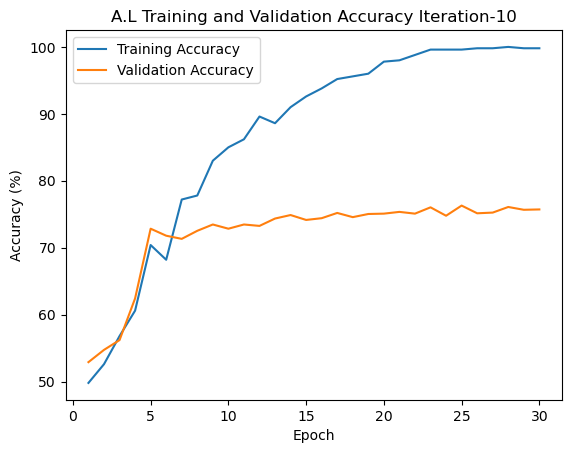

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 76.65%, POOL data F1 Score: 0.7661


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 75.92883307169022%
Test F1 Score: 0.7438752783964366
Saved model with best Test accuracy: 75.93%

************Iteration Number 11****************
Number of images in dataset1: 540
Number of images in dataset2: 14679
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7284, Training Accuracy: 49.07%, Training F1 Score: 0.4854
Epoch [1/30], Val_acc: 48.98%, Validation F1 Score: 0.3774
Saved model with best validation accuracy: 48.98%
Epoch [2/30], Loss: 0.7065, Training Accuracy: 54.63%, Training F1 Score: 0.5446
Epoch [2/30], Val_acc: 50.71%, Validation F1 Score: 0.3554
Saved model with best validation accuracy: 50.71%
Epoch [3/30], Loss: 0.6265, Training Accuracy: 62.41%, Training F1 Score: 0.6207
Epoch [3/30], Val_acc: 57.67%, Validation F1 Score: 0.5123
Saved model with best validation accuracy: 57.67%
Epoch [4/30], Loss: 0.5687, Training Accuracy: 66.85%, Training F1 Score: 0.6678
Epoch [4/30], Val_acc: 58.87%, Validation F1 Score: 0.5343
Saved model with best validation accuracy: 58.87%
Epoch [5/30], Loss: 0.5114, Training Accuracy: 70.37%, Training F1 Score: 0.7002
Epoch [5/30], Val_acc: 70.07%, Validation F1 Score: 0.6976
Saved model with best validation accuracy: 70.07%
Epoch [6/30], Loss: 0.4968, Training Accuracy: 72.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 76.57%, POOL data F1 Score: 0.7656


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 74.04500261643119%
Test F1 Score: 0.7330462863293865

************Iteration Number 12****************
Number of images in dataset1: 580
Number of images in dataset2: 14633
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7146, Training Accuracy: 54.66%, Training F1 Score: 0.5464
Epoch [1/30], Val_acc: 64.31%, Validation F1 Score: 0.6393
Saved model with best validation accuracy: 64.31%
Epoch [2/30], Loss: 0.6524, Training Accuracy: 60.86%, Training F1 Score: 0.6076
Epoch [2/30], Val_acc: 67.24%, Validation F1 Score: 0.6676
Saved model with best validation accuracy: 67.24%
Epoch [3/30], Loss: 0.5597, Training Accuracy: 65.17%, Training F1 Score: 0.6463
Epoch [3/30], Val_acc: 70.17%, Validation F1 Score: 0.6984
Saved model with best validation accuracy: 70.17%
Epoch [4/30], Loss: 0.5698, Training Accuracy: 70.86%, Training F1 Score: 0.7084
Epoch [4/30], Val_acc: 73.68%, Validation F1 Score: 0.7363
Saved model with best validation accuracy: 73.68%
Epoch [5/30], Loss: 0.5316, Training Accuracy: 72.76%, Training F1 Score: 0.7275
Epoch [5/30], Val_acc: 74.05%, Validation F1 Score: 0.7404
Saved model with best validation accuracy: 74.05%
Epoch [6/30], Loss: 0.4714, Training Accuracy: 76.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 77.21%, POOL data F1 Score: 0.7718


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 76.39979068550497%
Test F1 Score: 0.7526055951727921
Saved model with best Test accuracy: 76.40%

************Iteration Number 13****************
Number of images in dataset1: 620
Number of images in dataset2: 14586
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7370, Training Accuracy: 49.68%, Training F1 Score: 0.4917
Epoch [1/30], Val_acc: 49.03%, Validation F1 Score: 0.4172
Saved model with best validation accuracy: 49.03%
Epoch [2/30], Loss: 0.6953, Training Accuracy: 54.52%, Training F1 Score: 0.5429
Epoch [2/30], Val_acc: 60.54%, Validation F1 Score: 0.5835
Saved model with best validation accuracy: 60.54%
Epoch [3/30], Loss: 0.6453, Training Accuracy: 60.00%, Training F1 Score: 0.5994
Epoch [3/30], Val_acc: 68.76%, Validation F1 Score: 0.6867
Saved model with best validation accuracy: 68.76%
Epoch [4/30], Loss: 0.6130, Training Accuracy: 68.39%, Training F1 Score: 0.6800
Epoch [4/30], Val_acc: 70.80%, Validation F1 Score: 0.7030
Saved model with best validation accuracy: 70.80%
Epoch [5/30], Loss: 0.5696, Training Accuracy: 68.71%, Training F1 Score: 0.6823
Epoch [5/30], Val_acc: 74.57%, Validation F1 Score: 0.7454
Saved model with best validation accuracy: 74.57%
Epoch [6/30], Loss: 0.5550, Training Accuracy: 71.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 77.08%, POOL data F1 Score: 0.7707


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 75.56253270538984%
Test F1 Score: 0.7511987213638786

************Iteration Number 14****************
Number of images in dataset1: 660
Number of images in dataset2: 14539
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.8214, Training Accuracy: 49.70%, Training F1 Score: 0.4672
Epoch [1/30], Val_acc: 48.72%, Validation F1 Score: 0.3792
Saved model with best validation accuracy: 48.72%
Epoch [2/30], Loss: 0.6812, Training Accuracy: 51.67%, Training F1 Score: 0.5163
Epoch [2/30], Val_acc: 63.37%, Validation F1 Score: 0.6305
Saved model with best validation accuracy: 63.37%
Epoch [3/30], Loss: 0.6822, Training Accuracy: 59.70%, Training F1 Score: 0.5867
Epoch [3/30], Val_acc: 63.16%, Validation F1 Score: 0.6181
Epoch [4/30], Loss: 0.6625, Training Accuracy: 64.85%, Training F1 Score: 0.6443
Epoch [4/30], Val_acc: 71.17%, Validation F1 Score: 0.7115
Saved model with best validation accuracy: 71.17%
Epoch [5/30], Loss: 0.5577, Training Accuracy: 67.27%, Training F1 Score: 0.6696
Epoch [5/30], Val_acc: 70.49%, Validation F1 Score: 0.7000
Epoch [6/30], Loss: 0.5297, Training Accuracy: 74.09%, Training F1 Score: 0.7401
Epoch [6/30], Val_acc: 73.68%, Validation F1 Score: 0.7368
Saved mode

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 77.25%, POOL data F1 Score: 0.7724


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 76.92307692307692%
Test F1 Score: 0.7632850241545894
Saved model with best Test accuracy: 76.92%

************Iteration Number 15****************
Number of images in dataset1: 700
Number of images in dataset2: 14493
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7227, Training Accuracy: 48.86%, Training F1 Score: 0.4731
Epoch [1/30], Val_acc: 54.00%, Validation F1 Score: 0.5056
Saved model with best validation accuracy: 54.00%
Epoch [2/30], Loss: 0.6700, Training Accuracy: 55.14%, Training F1 Score: 0.4744
Epoch [2/30], Val_acc: 54.84%, Validation F1 Score: 0.4565
Saved model with best validation accuracy: 54.84%
Epoch [3/30], Loss: 0.6680, Training Accuracy: 57.14%, Training F1 Score: 0.5652
Epoch [3/30], Val_acc: 70.43%, Validation F1 Score: 0.7037
Saved model with best validation accuracy: 70.43%
Epoch [4/30], Loss: 0.5811, Training Accuracy: 68.00%, Training F1 Score: 0.6689
Epoch [4/30], Val_acc: 73.99%, Validation F1 Score: 0.7399
Saved model with best validation accuracy: 73.99%
Epoch [5/30], Loss: 0.5084, Training Accuracy: 71.29%, Training F1 Score: 0.7124
Epoch [5/30], Val_acc: 74.15%, Validation F1 Score: 0.7415
Saved model with best validation accuracy: 74.15%
Epoch [6/30], Loss: 0.5431, Training Accuracy: 74.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 77.29%, POOL data F1 Score: 0.7729


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 75.98116169544741%
Test F1 Score: 0.750678978815861

************Iteration Number 16****************
Number of images in dataset1: 740
Number of images in dataset2: 14450
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7337, Training Accuracy: 51.89%, Training F1 Score: 0.4928
Epoch [1/30], Val_acc: 55.31%, Validation F1 Score: 0.4735
Saved model with best validation accuracy: 55.31%
Epoch [2/30], Loss: 0.6698, Training Accuracy: 52.97%, Training F1 Score: 0.5123
Epoch [2/30], Val_acc: 55.21%, Validation F1 Score: 0.4692
Epoch [3/30], Loss: 0.6622, Training Accuracy: 60.54%, Training F1 Score: 0.5834
Epoch [3/30], Val_acc: 71.59%, Validation F1 Score: 0.7158
Saved model with best validation accuracy: 71.59%
Epoch [4/30], Loss: 0.6190, Training Accuracy: 66.22%, Training F1 Score: 0.6611
Epoch [4/30], Val_acc: 74.46%, Validation F1 Score: 0.7444
Saved model with best validation accuracy: 74.46%
Epoch [5/30], Loss: 0.5962, Training Accuracy: 68.24%, Training F1 Score: 0.6796
Epoch [5/30], Val_acc: 74.41%, Validation F1 Score: 0.7441
Epoch [6/30], Loss: 0.5677, Training Accuracy: 73.38%, Training F1 Score: 0.7314
Epoch [6/30], Val_acc: 75.82%, Validation F1 Score: 0.7582
Saved mode

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 77.60%, POOL data F1 Score: 0.7760


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 76.50444793301936%
Test F1 Score: 0.7630606860158311

************Iteration Number 17****************
Number of images in dataset1: 780
Number of images in dataset2: 14405
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.9762, Training Accuracy: 50.64%, Training F1 Score: 0.5008
Epoch [1/30], Val_acc: 52.33%, Validation F1 Score: 0.4532
Saved model with best validation accuracy: 52.33%
Epoch [2/30], Loss: 0.5735, Training Accuracy: 54.74%, Training F1 Score: 0.5317
Epoch [2/30], Val_acc: 61.59%, Validation F1 Score: 0.5967
Saved model with best validation accuracy: 61.59%
Epoch [3/30], Loss: 0.6011, Training Accuracy: 61.92%, Training F1 Score: 0.6162
Epoch [3/30], Val_acc: 60.02%, Validation F1 Score: 0.5533
Epoch [4/30], Loss: 0.6931, Training Accuracy: 65.26%, Training F1 Score: 0.6480
Epoch [4/30], Val_acc: 72.37%, Validation F1 Score: 0.7211
Saved model with best validation accuracy: 72.37%
Epoch [5/30], Loss: 0.5750, Training Accuracy: 66.79%, Training F1 Score: 0.6463
Epoch [5/30], Val_acc: 74.57%, Validation F1 Score: 0.7457
Saved model with best validation accuracy: 74.57%
Epoch [6/30], Loss: 0.5999, Training Accuracy: 73.85%, Training F1 Score: 0.7384
Epoch [6/30], Val_a

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 77.58%, POOL data F1 Score: 0.7758


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 76.138147566719%
Test F1 Score: 0.7605042016806722

************Iteration Number 18****************
Number of images in dataset1: 820
Number of images in dataset2: 14357
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7009, Training Accuracy: 54.76%, Training F1 Score: 0.5468
Epoch [1/30], Val_acc: 52.49%, Validation F1 Score: 0.4485
Saved model with best validation accuracy: 52.49%
Epoch [2/30], Loss: 0.6628, Training Accuracy: 58.41%, Training F1 Score: 0.5785
Epoch [2/30], Val_acc: 64.36%, Validation F1 Score: 0.6402
Saved model with best validation accuracy: 64.36%
Epoch [3/30], Loss: 0.6633, Training Accuracy: 61.71%, Training F1 Score: 0.6167
Epoch [3/30], Val_acc: 71.79%, Validation F1 Score: 0.7178
Saved model with best validation accuracy: 71.79%
Epoch [4/30], Loss: 0.6593, Training Accuracy: 65.98%, Training F1 Score: 0.6543
Epoch [4/30], Val_acc: 72.79%, Validation F1 Score: 0.7269
Saved model with best validation accuracy: 72.79%
Epoch [5/30], Loss: 0.5031, Training Accuracy: 68.66%, Training F1 Score: 0.6845
Epoch [5/30], Val_acc: 76.24%, Validation F1 Score: 0.7620
Saved model with best validation accuracy: 76.24%
Epoch [6/30], Loss: 0.5231, Training Accuracy: 73.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 77.65%, POOL data F1 Score: 0.7758


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 76.76609105180533%
Test F1 Score: 0.7516778523489932

************Iteration Number 19****************
Number of images in dataset1: 860
Number of images in dataset2: 14314
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.6877, Training Accuracy: 50.23%, Training F1 Score: 0.5022
Epoch [1/30], Val_acc: 57.88%, Validation F1 Score: 0.5782
Saved model with best validation accuracy: 57.88%
Epoch [2/30], Loss: 0.6690, Training Accuracy: 58.26%, Training F1 Score: 0.5757
Epoch [2/30], Val_acc: 69.13%, Validation F1 Score: 0.6912
Saved model with best validation accuracy: 69.13%
Epoch [3/30], Loss: 0.6008, Training Accuracy: 64.07%, Training F1 Score: 0.6407
Epoch [3/30], Val_acc: 73.16%, Validation F1 Score: 0.7298
Saved model with best validation accuracy: 73.16%
Epoch [4/30], Loss: 0.6182, Training Accuracy: 68.14%, Training F1 Score: 0.6711
Epoch [4/30], Val_acc: 75.30%, Validation F1 Score: 0.7529
Saved model with best validation accuracy: 75.30%
Epoch [5/30], Loss: 0.5297, Training Accuracy: 73.26%, Training F1 Score: 0.7319
Epoch [5/30], Val_acc: 77.03%, Validation F1 Score: 0.7699
Saved model with best validation accuracy: 77.03%
Epoch [6/30], Loss: 0.5795, Training Accuracy: 74.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 78.41%, POOL data F1 Score: 0.7838


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.70800627943485%
Test F1 Score: 0.7697297297297296
Saved model with best Test accuracy: 77.71%

************Iteration Number 20****************
Number of images in dataset1: 900
Number of images in dataset2: 14270
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.8255, Training Accuracy: 51.11%, Training F1 Score: 0.5099
Epoch [1/30], Val_acc: 49.87%, Validation F1 Score: 0.3364
Saved model with best validation accuracy: 49.87%
Epoch [2/30], Loss: 0.6401, Training Accuracy: 57.67%, Training F1 Score: 0.5644
Epoch [2/30], Val_acc: 60.28%, Validation F1 Score: 0.5856
Saved model with best validation accuracy: 60.28%
Epoch [3/30], Loss: 0.5711, Training Accuracy: 58.56%, Training F1 Score: 0.5656
Epoch [3/30], Val_acc: 63.58%, Validation F1 Score: 0.6058
Saved model with best validation accuracy: 63.58%
Epoch [4/30], Loss: 0.7549, Training Accuracy: 67.89%, Training F1 Score: 0.6688
Epoch [4/30], Val_acc: 72.48%, Validation F1 Score: 0.7236
Saved model with best validation accuracy: 72.48%
Epoch [5/30], Loss: 0.6635, Training Accuracy: 68.89%, Training F1 Score: 0.6889
Epoch [5/30], Val_acc: 70.23%, Validation F1 Score: 0.6965
Epoch [6/30], Loss: 0.7273, Training Accuracy: 73.67%, Training F1 Score: 0.7356
Epoch [6/30], Val_a

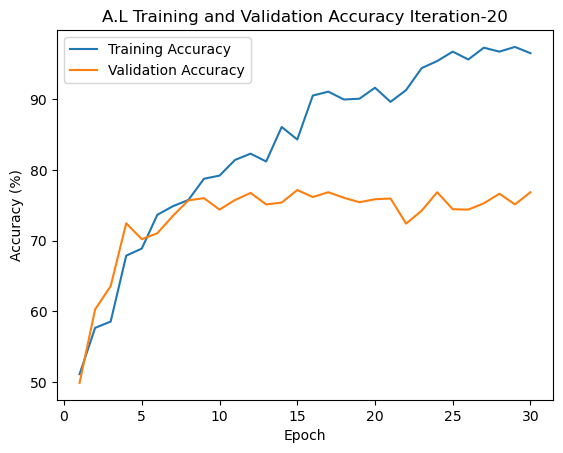

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 77.79%, POOL data F1 Score: 0.7778


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 76.71376242804814%
Test F1 Score: 0.7631718999467803

************Iteration Number 21****************
Number of images in dataset1: 940
Number of images in dataset2: 14227
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.6758, Training Accuracy: 53.19%, Training F1 Score: 0.5310
Epoch [1/30], Val_acc: 51.18%, Validation F1 Score: 0.4470
Saved model with best validation accuracy: 51.18%
Epoch [2/30], Loss: 0.6056, Training Accuracy: 60.64%, Training F1 Score: 0.6054
Epoch [2/30], Val_acc: 63.89%, Validation F1 Score: 0.6307
Saved model with best validation accuracy: 63.89%
Epoch [3/30], Loss: 0.5931, Training Accuracy: 66.06%, Training F1 Score: 0.6551
Epoch [3/30], Val_acc: 70.96%, Validation F1 Score: 0.7093
Saved model with best validation accuracy: 70.96%
Epoch [4/30], Loss: 0.5833, Training Accuracy: 66.91%, Training F1 Score: 0.6690
Epoch [4/30], Val_acc: 74.25%, Validation F1 Score: 0.7424
Saved model with best validation accuracy: 74.25%
Epoch [5/30], Loss: 0.5031, Training Accuracy: 70.96%, Training F1 Score: 0.7025
Epoch [5/30], Val_acc: 73.57%, Validation F1 Score: 0.7327
Epoch [6/30], Loss: 0.5698, Training Accuracy: 74.68%, Training F1 Score: 0.7463
Epoch [6/30], Val_a

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 78.05%, POOL data F1 Score: 0.7805


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 76.66143380429095%
Test F1 Score: 0.7662473794549266

************Iteration Number 22****************
Number of images in dataset1: 980
Number of images in dataset2: 14182
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.8334, Training Accuracy: 49.80%, Training F1 Score: 0.4980
Epoch [1/30], Val_acc: 51.39%, Validation F1 Score: 0.3890
Saved model with best validation accuracy: 51.39%
Epoch [2/30], Loss: 0.7272, Training Accuracy: 53.88%, Training F1 Score: 0.5374
Epoch [2/30], Val_acc: 63.32%, Validation F1 Score: 0.6186
Saved model with best validation accuracy: 63.32%
Epoch [3/30], Loss: 0.6432, Training Accuracy: 60.92%, Training F1 Score: 0.6009
Epoch [3/30], Val_acc: 71.01%, Validation F1 Score: 0.7090
Saved model with best validation accuracy: 71.01%
Epoch [4/30], Loss: 0.5767, Training Accuracy: 66.43%, Training F1 Score: 0.6621
Epoch [4/30], Val_acc: 73.73%, Validation F1 Score: 0.7369
Saved model with best validation accuracy: 73.73%
Epoch [5/30], Loss: 0.5928, Training Accuracy: 70.51%, Training F1 Score: 0.7010
Epoch [5/30], Val_acc: 74.25%, Validation F1 Score: 0.7417
Saved model with best validation accuracy: 74.25%
Epoch [6/30], Loss: 0.5499, Training Accuracy: 72.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 78.61%, POOL data F1 Score: 0.7854


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.1847200418629%
Test F1 Score: 0.7536723163841809

************Iteration Number 23****************
Number of images in dataset1: 1020
Number of images in dataset2: 14137


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 1.0704, Training Accuracy: 49.80%, Training F1 Score: 0.4980
Epoch [1/30], Val_acc: 49.97%, Validation F1 Score: 0.3432
Saved model with best validation accuracy: 49.97%
Epoch [2/30], Loss: 0.6962, Training Accuracy: 54.41%, Training F1 Score: 0.5438
Epoch [2/30], Val_acc: 51.39%, Validation F1 Score: 0.3697
Saved model with best validation accuracy: 51.39%
Epoch [3/30], Loss: 0.6962, Training Accuracy: 60.29%, Training F1 Score: 0.5980
Epoch [3/30], Val_acc: 71.79%, Validation F1 Score: 0.7114
Saved model with best validation accuracy: 71.79%
Epoch [4/30], Loss: 0.5892, Training Accuracy: 68.04%, Training F1 Score: 0.6792
Epoch [4/30], Val_acc: 75.51%, Validation F1 Score: 0.7546
Saved model with best validation accuracy: 75.51%
Epoch [5/30], Loss: 0.5472, Training Accuracy: 72.16%, Training F1 Score: 0.7201
Epoch [5/30], Val_acc: 75.72%, Validation F1 Score: 0.7553
Saved model with best validation accuracy: 75.72%
Epoch [6/30], Loss: 0.5014, Trai

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 78.52%, POOL data F1 Score: 0.7850


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.39403453689168%
Test F1 Score: 0.7657266811279826

************Iteration Number 24****************
Number of images in dataset1: 1060
Number of images in dataset2: 14087
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7401, Training Accuracy: 46.98%, Training F1 Score: 0.4683
Epoch [1/30], Val_acc: 50.29%, Validation F1 Score: 0.4639
Saved model with best validation accuracy: 50.29%
Epoch [2/30], Loss: 0.7733, Training Accuracy: 54.81%, Training F1 Score: 0.5260
Epoch [2/30], Val_acc: 66.77%, Validation F1 Score: 0.6617
Saved model with best validation accuracy: 66.77%
Epoch [3/30], Loss: 0.7165, Training Accuracy: 62.36%, Training F1 Score: 0.6236
Epoch [3/30], Val_acc: 72.16%, Validation F1 Score: 0.7196
Saved model with best validation accuracy: 72.16%
Epoch [4/30], Loss: 0.6380, Training Accuracy: 65.66%, Training F1 Score: 0.6543
Epoch [4/30], Val_acc: 69.91%, Validation F1 Score: 0.6895
Epoch [5/30], Loss: 0.6274, Training Accuracy: 71.04%, Training F1 Score: 0.7102
Epoch [5/30], Val_acc: 75.56%, Validation F1 Score: 0.7552
Saved model with best validation accuracy: 75.56%
Epoch [6/30], Loss: 0.5929, Training Accuracy: 74.72%, Training F1 Score: 0.7467
Epoch [6/30], Val_a

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 78.54%, POOL data F1 Score: 0.7853


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.60334903192046%
Test F1 Score: 0.7696447793326158

************Iteration Number 25****************
Number of images in dataset1: 1100
Number of images in dataset2: 14044
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7254, Training Accuracy: 48.73%, Training F1 Score: 0.4872
Epoch [1/30], Val_acc: 49.35%, Validation F1 Score: 0.4241
Saved model with best validation accuracy: 49.35%
Epoch [2/30], Loss: 0.6365, Training Accuracy: 56.36%, Training F1 Score: 0.5411
Epoch [2/30], Val_acc: 58.66%, Validation F1 Score: 0.5406
Saved model with best validation accuracy: 58.66%
Epoch [3/30], Loss: 0.5574, Training Accuracy: 62.91%, Training F1 Score: 0.6275
Epoch [3/30], Val_acc: 56.67%, Validation F1 Score: 0.4814
Epoch [4/30], Loss: 0.6220, Training Accuracy: 66.82%, Training F1 Score: 0.6579
Epoch [4/30], Val_acc: 73.16%, Validation F1 Score: 0.7283
Saved model with best validation accuracy: 73.16%
Epoch [5/30], Loss: 0.5376, Training Accuracy: 67.45%, Training F1 Score: 0.6735
Epoch [5/30], Val_acc: 76.24%, Validation F1 Score: 0.7623
Saved model with best validation accuracy: 76.24%
Epoch [6/30], Loss: 0.4962, Training Accuracy: 75.09%, Training F1 Score: 0.7503
Epoch [6/30], Val_a

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 78.42%, POOL data F1 Score: 0.7842


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.49869178440608%
Test F1 Score: 0.777432712215321

************Iteration Number 26****************
Number of images in dataset1: 1140
Number of images in dataset2: 14000


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.7369, Training Accuracy: 45.70%, Training F1 Score: 0.4538
Epoch [1/30], Val_acc: 54.21%, Validation F1 Score: 0.4879
Saved model with best validation accuracy: 54.21%
Epoch [2/30], Loss: 0.6603, Training Accuracy: 56.32%, Training F1 Score: 0.5632
Epoch [2/30], Val_acc: 66.72%, Validation F1 Score: 0.6593
Saved model with best validation accuracy: 66.72%
Epoch [3/30], Loss: 0.6297, Training Accuracy: 59.39%, Training F1 Score: 0.5925
Epoch [3/30], Val_acc: 71.01%, Validation F1 Score: 0.7080
Saved model with best validation accuracy: 71.01%
Epoch [4/30], Loss: 0.6230, Training Accuracy: 64.30%, Training F1 Score: 0.6337
Epoch [4/30], Val_acc: 72.00%, Validation F1 Score: 0.7174
Saved model with best validation accuracy: 72.00%
Epoch [5/30], Loss: 0.6460, Training Accuracy: 68.07%, Training F1 Score: 0.6801
Epoch [5/30], Val_acc: 75.20%, Validation F1 Score: 0.7518
Saved model with best validation accuracy: 75.20%
Epoch [6/30], Loss: 0.5604, Trai

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 77.74%, POOL data F1 Score: 0.7770


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 75.98116169544741%
Test F1 Score: 0.7473858007705009

************Iteration Number 27****************
Number of images in dataset1: 1180
Number of images in dataset2: 13954


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.7158, Training Accuracy: 47.03%, Training F1 Score: 0.4703
Epoch [1/30], Val_acc: 44.79%, Validation F1 Score: 0.4468
Saved model with best validation accuracy: 44.79%
Epoch [2/30], Loss: 0.8604, Training Accuracy: 56.02%, Training F1 Score: 0.5216
Epoch [2/30], Val_acc: 54.16%, Validation F1 Score: 0.4255
Saved model with best validation accuracy: 54.16%
Epoch [3/30], Loss: 0.7888, Training Accuracy: 59.49%, Training F1 Score: 0.5945
Epoch [3/30], Val_acc: 73.00%, Validation F1 Score: 0.7290
Saved model with best validation accuracy: 73.00%
Epoch [4/30], Loss: 0.5475, Training Accuracy: 64.24%, Training F1 Score: 0.6413
Epoch [4/30], Val_acc: 74.67%, Validation F1 Score: 0.7455
Saved model with best validation accuracy: 74.67%
Epoch [5/30], Loss: 0.5864, Training Accuracy: 68.90%, Training F1 Score: 0.6861
Epoch [5/30], Val_acc: 74.15%, Validation F1 Score: 0.7414
Epoch [6/30], Loss: 0.4307, Training Accuracy: 72.29%, Training F1 Score: 0.7185
E

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 78.12%, POOL data F1 Score: 0.7811


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 76.60910518053375%
Test F1 Score: 0.7638668779714739

************Iteration Number 28****************
Number of images in dataset1: 1220
Number of images in dataset2: 13904
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7750, Training Accuracy: 50.41%, Training F1 Score: 0.4988
Epoch [1/30], Val_acc: 57.30%, Validation F1 Score: 0.5641
Saved model with best validation accuracy: 57.30%
Epoch [2/30], Loss: 0.6767, Training Accuracy: 55.90%, Training F1 Score: 0.5568
Epoch [2/30], Val_acc: 69.13%, Validation F1 Score: 0.6875
Saved model with best validation accuracy: 69.13%
Epoch [3/30], Loss: 0.6426, Training Accuracy: 61.48%, Training F1 Score: 0.6088
Epoch [3/30], Val_acc: 72.53%, Validation F1 Score: 0.7228
Saved model with best validation accuracy: 72.53%
Epoch [4/30], Loss: 0.6305, Training Accuracy: 65.57%, Training F1 Score: 0.6523
Epoch [4/30], Val_acc: 73.26%, Validation F1 Score: 0.7297
Saved model with best validation accuracy: 73.26%
Epoch [5/30], Loss: 0.6161, Training Accuracy: 68.28%, Training F1 Score: 0.6825
Epoch [5/30], Val_acc: 74.99%, Validation F1 Score: 0.7483
Saved model with best validation accuracy: 74.99%
Epoch [6/30], Loss: 0.5349, Training Accuracy: 72.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 78.73%, POOL data F1 Score: 0.7872


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.86499215070644%
Test F1 Score: 0.7767810026385223
Saved model with best Test accuracy: 77.86%

************Iteration Number 29****************
Number of images in dataset1: 1260
Number of images in dataset2: 13858
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.6451, Training Accuracy: 52.46%, Training F1 Score: 0.5206
Epoch [1/30], Val_acc: 64.47%, Validation F1 Score: 0.6287
Saved model with best validation accuracy: 64.47%
Epoch [2/30], Loss: 0.6759, Training Accuracy: 58.97%, Training F1 Score: 0.5892
Epoch [2/30], Val_acc: 70.64%, Validation F1 Score: 0.7058
Saved model with best validation accuracy: 70.64%
Epoch [3/30], Loss: 0.6613, Training Accuracy: 60.63%, Training F1 Score: 0.6020
Epoch [3/30], Val_acc: 74.57%, Validation F1 Score: 0.7450
Saved model with best validation accuracy: 74.57%
Epoch [4/30], Loss: 0.5884, Training Accuracy: 66.43%, Training F1 Score: 0.6572
Epoch [4/30], Val_acc: 75.51%, Validation F1 Score: 0.7538
Saved model with best validation accuracy: 75.51%
Epoch [5/30], Loss: 0.6851, Training Accuracy: 69.92%, Training F1 Score: 0.6992
Epoch [5/30], Val_acc: 74.25%, Validation F1 Score: 0.7366
Epoch [6/30], Loss: 0.5588, Training Accuracy: 70.71%, Training F1 Score: 0.7070
Epoch [6/30], Val_a

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 79.17%, POOL data F1 Score: 0.7916


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.96389324960754%
Test F1 Score: 0.784796573875803
Saved model with best Test accuracy: 78.96%

************Iteration Number 30****************
Number of images in dataset1: 1300
Number of images in dataset2: 13814
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7686, Training Accuracy: 53.92%, Training F1 Score: 0.5370
Epoch [1/30], Val_acc: 58.45%, Validation F1 Score: 0.5273
Saved model with best validation accuracy: 58.45%
Epoch [2/30], Loss: 0.6031, Training Accuracy: 61.92%, Training F1 Score: 0.6103
Epoch [2/30], Val_acc: 71.27%, Validation F1 Score: 0.7127
Saved model with best validation accuracy: 71.27%
Epoch [3/30], Loss: 0.6001, Training Accuracy: 65.31%, Training F1 Score: 0.6422
Epoch [3/30], Val_acc: 72.27%, Validation F1 Score: 0.7222
Saved model with best validation accuracy: 72.27%
Epoch [4/30], Loss: 0.5795, Training Accuracy: 68.38%, Training F1 Score: 0.6834
Epoch [4/30], Val_acc: 73.57%, Validation F1 Score: 0.7325
Saved model with best validation accuracy: 73.57%
Epoch [5/30], Loss: 0.6690, Training Accuracy: 72.15%, Training F1 Score: 0.7188
Epoch [5/30], Val_acc: 75.61%, Validation F1 Score: 0.7559
Saved model with best validation accuracy: 75.61%
Epoch [6/30], Loss: 0.6099, Training Accuracy: 75.

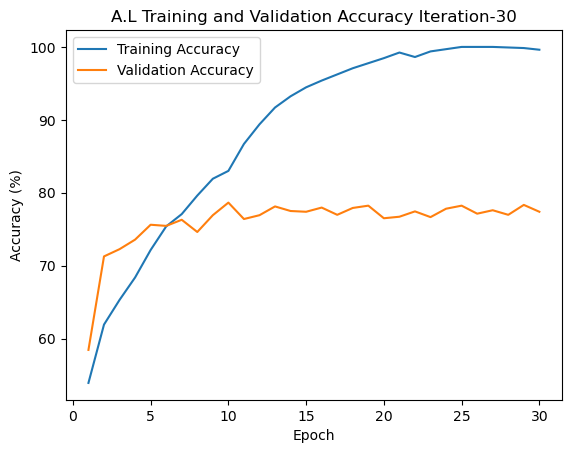

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 78.26%, POOL data F1 Score: 0.7822


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.96964939822082%
Test F1 Score: 0.7902341803687095

************Iteration Number 31****************
Number of images in dataset1: 1340
Number of images in dataset2: 13769


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.6913, Training Accuracy: 48.96%, Training F1 Score: 0.4893
Epoch [1/30], Val_acc: 51.44%, Validation F1 Score: 0.3699
Saved model with best validation accuracy: 51.44%
Epoch [2/30], Loss: 0.6429, Training Accuracy: 59.03%, Training F1 Score: 0.5854
Epoch [2/30], Val_acc: 62.01%, Validation F1 Score: 0.5784
Saved model with best validation accuracy: 62.01%
Epoch [3/30], Loss: 0.5928, Training Accuracy: 62.69%, Training F1 Score: 0.6234
Epoch [3/30], Val_acc: 70.85%, Validation F1 Score: 0.6993
Saved model with best validation accuracy: 70.85%
Epoch [4/30], Loss: 0.5350, Training Accuracy: 67.24%, Training F1 Score: 0.6711
Epoch [4/30], Val_acc: 75.77%, Validation F1 Score: 0.7575
Saved model with best validation accuracy: 75.77%
Epoch [5/30], Loss: 0.5311, Training Accuracy: 70.45%, Training F1 Score: 0.7036
Epoch [5/30], Val_acc: 76.35%, Validation F1 Score: 0.7632
Saved model with best validation accuracy: 76.35%
Epoch [6/30], Loss: 0.5807, Trai

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 79.80%, POOL data F1 Score: 0.7980


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.70225013082155%
Test F1 Score: 0.7876890975482526

************Iteration Number 32****************
Number of images in dataset1: 1380
Number of images in dataset2: 13727


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.6799, Training Accuracy: 53.26%, Training F1 Score: 0.5326
Epoch [1/30], Val_acc: 64.31%, Validation F1 Score: 0.6371
Saved model with best validation accuracy: 64.31%
Epoch [2/30], Loss: 0.7879, Training Accuracy: 56.88%, Training F1 Score: 0.5678
Epoch [2/30], Val_acc: 67.97%, Validation F1 Score: 0.6735
Saved model with best validation accuracy: 67.97%
Epoch [3/30], Loss: 0.6830, Training Accuracy: 62.25%, Training F1 Score: 0.6156
Epoch [3/30], Val_acc: 68.39%, Validation F1 Score: 0.6737
Saved model with best validation accuracy: 68.39%
Epoch [4/30], Loss: 0.6519, Training Accuracy: 64.93%, Training F1 Score: 0.6482
Epoch [4/30], Val_acc: 74.25%, Validation F1 Score: 0.7422
Saved model with best validation accuracy: 74.25%
Epoch [5/30], Loss: 0.5874, Training Accuracy: 71.96%, Training F1 Score: 0.7195
Epoch [5/30], Val_acc: 75.25%, Validation F1 Score: 0.7516
Saved model with best validation accuracy: 75.25%
Epoch [6/30], Loss: 0.5470, Trai

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 78.20%, POOL data F1 Score: 0.7817


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.39403453689168%
Test F1 Score: 0.784

************Iteration Number 33****************
Number of images in dataset1: 1420
Number of images in dataset2: 13681


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.6957, Training Accuracy: 51.06%, Training F1 Score: 0.5074
Epoch [1/30], Val_acc: 50.81%, Validation F1 Score: 0.4905
Saved model with best validation accuracy: 50.81%
Epoch [2/30], Loss: 0.6423, Training Accuracy: 57.96%, Training F1 Score: 0.5789
Epoch [2/30], Val_acc: 65.41%, Validation F1 Score: 0.6489
Saved model with best validation accuracy: 65.41%
Epoch [3/30], Loss: 0.4973, Training Accuracy: 63.73%, Training F1 Score: 0.6373
Epoch [3/30], Val_acc: 73.73%, Validation F1 Score: 0.7373
Saved model with best validation accuracy: 73.73%
Epoch [4/30], Loss: 0.6890, Training Accuracy: 65.56%, Training F1 Score: 0.6555
Epoch [4/30], Val_acc: 75.30%, Validation F1 Score: 0.7512
Saved model with best validation accuracy: 75.30%
Epoch [5/30], Loss: 0.6704, Training Accuracy: 69.51%, Training F1 Score: 0.6951
Epoch [5/30], Val_acc: 76.35%, Validation F1 Score: 0.7635
Saved model with best validation accuracy: 76.35%
Epoch [6/30], Loss: 0.4687, Trai

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 78.98%, POOL data F1 Score: 0.7896


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.1789638932496%
Test F1 Score: 0.7895002523977789

************Iteration Number 34****************
Number of images in dataset1: 1460
Number of images in dataset2: 13637
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.6603, Training Accuracy: 51.71%, Training F1 Score: 0.5152
Epoch [1/30], Val_acc: 59.97%, Validation F1 Score: 0.5484
Saved model with best validation accuracy: 59.97%
Epoch [2/30], Loss: 0.6371, Training Accuracy: 57.67%, Training F1 Score: 0.5754
Epoch [2/30], Val_acc: 70.33%, Validation F1 Score: 0.7016
Saved model with best validation accuracy: 70.33%
Epoch [3/30], Loss: 0.6278, Training Accuracy: 63.97%, Training F1 Score: 0.6391
Epoch [3/30], Val_acc: 74.36%, Validation F1 Score: 0.7436
Saved model with best validation accuracy: 74.36%
Epoch [4/30], Loss: 0.5960, Training Accuracy: 66.71%, Training F1 Score: 0.6668
Epoch [4/30], Val_acc: 73.16%, Validation F1 Score: 0.7289
Epoch [5/30], Loss: 0.6030, Training Accuracy: 70.89%, Training F1 Score: 0.7088
Epoch [5/30], Val_acc: 75.46%, Validation F1 Score: 0.7540
Saved model with best validation accuracy: 75.46%
Epoch [6/30], Loss: 0.6612, Training Accuracy: 75.07%, Training F1 Score: 0.7502
Epoch [6/30], Val_a

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 78.66%, POOL data F1 Score: 0.7862


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.07430664573522%
Test F1 Score: 0.7728997289972901

************Iteration Number 35****************
Number of images in dataset1: 1500
Number of images in dataset2: 13587
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7479, Training Accuracy: 52.00%, Training F1 Score: 0.5195
Epoch [1/30], Val_acc: 55.63%, Validation F1 Score: 0.5338
Saved model with best validation accuracy: 55.63%
Epoch [2/30], Loss: 0.6234, Training Accuracy: 59.40%, Training F1 Score: 0.5929
Epoch [2/30], Val_acc: 67.82%, Validation F1 Score: 0.6698
Saved model with best validation accuracy: 67.82%
Epoch [3/30], Loss: 0.6261, Training Accuracy: 64.20%, Training F1 Score: 0.6419
Epoch [3/30], Val_acc: 74.10%, Validation F1 Score: 0.7403
Saved model with best validation accuracy: 74.10%
Epoch [4/30], Loss: 0.5683, Training Accuracy: 66.80%, Training F1 Score: 0.6680
Epoch [4/30], Val_acc: 75.93%, Validation F1 Score: 0.7592
Saved model with best validation accuracy: 75.93%
Epoch [5/30], Loss: 0.5598, Training Accuracy: 70.27%, Training F1 Score: 0.7026
Epoch [5/30], Val_acc: 76.92%, Validation F1 Score: 0.7688
Saved model with best validation accuracy: 76.92%
Epoch [6/30], Loss: 0.5508, Training Accuracy: 74.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.13%, POOL data F1 Score: 0.8013


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.81266352694924%
Test F1 Score: 0.7761351636747624

************Iteration Number 36****************
Number of images in dataset1: 1540
Number of images in dataset2: 13543


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.3608, Training Accuracy: 53.05%, Training F1 Score: 0.5304
Epoch [1/30], Val_acc: 52.38%, Validation F1 Score: 0.4128
Saved model with best validation accuracy: 52.38%
Epoch [2/30], Loss: 1.0602, Training Accuracy: 57.86%, Training F1 Score: 0.5734
Epoch [2/30], Val_acc: 71.74%, Validation F1 Score: 0.7157
Saved model with best validation accuracy: 71.74%
Epoch [3/30], Loss: 0.6226, Training Accuracy: 61.49%, Training F1 Score: 0.6145
Epoch [3/30], Val_acc: 72.58%, Validation F1 Score: 0.7257
Saved model with best validation accuracy: 72.58%
Epoch [4/30], Loss: 0.7354, Training Accuracy: 63.96%, Training F1 Score: 0.6396
Epoch [4/30], Val_acc: 73.05%, Validation F1 Score: 0.7271
Saved model with best validation accuracy: 73.05%
Epoch [5/30], Loss: 0.5117, Training Accuracy: 68.25%, Training F1 Score: 0.6824
Epoch [5/30], Val_acc: 73.68%, Validation F1 Score: 0.7352
Saved model with best validation accuracy: 73.68%
Epoch [6/30], Loss: 0.8155, Trai

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 79.23%, POOL data F1 Score: 0.7921


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.96964939822082%
Test F1 Score: 0.776657824933687

************Iteration Number 37****************
Number of images in dataset1: 1580
Number of images in dataset2: 13492


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.7105, Training Accuracy: 50.70%, Training F1 Score: 0.5068
Epoch [1/30], Val_acc: 54.79%, Validation F1 Score: 0.4738
Saved model with best validation accuracy: 54.79%
Epoch [2/30], Loss: 0.7043, Training Accuracy: 59.24%, Training F1 Score: 0.5920
Epoch [2/30], Val_acc: 64.63%, Validation F1 Score: 0.6139
Saved model with best validation accuracy: 64.63%
Epoch [3/30], Loss: 0.6701, Training Accuracy: 64.49%, Training F1 Score: 0.6436
Epoch [3/30], Val_acc: 74.20%, Validation F1 Score: 0.7420
Saved model with best validation accuracy: 74.20%
Epoch [4/30], Loss: 0.5913, Training Accuracy: 68.48%, Training F1 Score: 0.6845
Epoch [4/30], Val_acc: 75.56%, Validation F1 Score: 0.7531
Saved model with best validation accuracy: 75.56%
Epoch [5/30], Loss: 0.5893, Training Accuracy: 72.09%, Training F1 Score: 0.7204
Epoch [5/30], Val_acc: 76.71%, Validation F1 Score: 0.7670
Saved model with best validation accuracy: 76.71%
Epoch [6/30], Loss: 0.5139, Trai

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 79.45%, POOL data F1 Score: 0.7944


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.07430664573522%
Test F1 Score: 0.7774827403080191

************Iteration Number 38****************
Number of images in dataset1: 1620
Number of images in dataset2: 13449
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7323, Training Accuracy: 53.52%, Training F1 Score: 0.5333
Epoch [1/30], Val_acc: 62.74%, Validation F1 Score: 0.6097
Saved model with best validation accuracy: 62.74%
Epoch [2/30], Loss: 0.6266, Training Accuracy: 61.67%, Training F1 Score: 0.6162
Epoch [2/30], Val_acc: 73.05%, Validation F1 Score: 0.7282
Saved model with best validation accuracy: 73.05%
Epoch [3/30], Loss: 0.5774, Training Accuracy: 65.74%, Training F1 Score: 0.6561
Epoch [3/30], Val_acc: 75.04%, Validation F1 Score: 0.7490
Saved model with best validation accuracy: 75.04%
Epoch [4/30], Loss: 0.5843, Training Accuracy: 69.88%, Training F1 Score: 0.6980
Epoch [4/30], Val_acc: 76.82%, Validation F1 Score: 0.7673
Saved model with best validation accuracy: 76.82%
Epoch [5/30], Loss: 0.5941, Training Accuracy: 73.64%, Training F1 Score: 0.7361
Epoch [5/30], Val_acc: 77.50%, Validation F1 Score: 0.7744
Saved model with best validation accuracy: 77.50%
Epoch [6/30], Loss: 0.4867, Training Accuracy: 76.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 79.83%, POOL data F1 Score: 0.7981


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 79.01622187336473%
Test F1 Score: 0.7842926304464767
Saved model with best Test accuracy: 79.02%

************Iteration Number 39****************
Number of images in dataset1: 1660
Number of images in dataset2: 13403
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7184, Training Accuracy: 51.27%, Training F1 Score: 0.5108
Epoch [1/30], Val_acc: 57.25%, Validation F1 Score: 0.4916
Saved model with best validation accuracy: 57.25%
Epoch [2/30], Loss: 0.6564, Training Accuracy: 58.07%, Training F1 Score: 0.5803
Epoch [2/30], Val_acc: 71.38%, Validation F1 Score: 0.7103
Saved model with best validation accuracy: 71.38%
Epoch [3/30], Loss: 0.5786, Training Accuracy: 64.94%, Training F1 Score: 0.6485
Epoch [3/30], Val_acc: 74.57%, Validation F1 Score: 0.7456
Saved model with best validation accuracy: 74.57%
Epoch [4/30], Loss: 0.6226, Training Accuracy: 67.05%, Training F1 Score: 0.6697
Epoch [4/30], Val_acc: 75.77%, Validation F1 Score: 0.7577
Saved model with best validation accuracy: 75.77%
Epoch [5/30], Loss: 0.5634, Training Accuracy: 72.29%, Training F1 Score: 0.7218
Epoch [5/30], Val_acc: 76.56%, Validation F1 Score: 0.7654
Saved model with best validation accuracy: 76.56%
Epoch [6/30], Loss: 0.5132, Training Accuracy: 75.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 79.23%, POOL data F1 Score: 0.7920


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 79.48717948717949%
Test F1 Score: 0.7912673056443025
Saved model with best Test accuracy: 79.49%

************Iteration Number 40****************
Number of images in dataset1: 1700
Number of images in dataset2: 13352


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.7362, Training Accuracy: 51.35%, Training F1 Score: 0.5096
Epoch [1/30], Val_acc: 50.29%, Validation F1 Score: 0.4166
Saved model with best validation accuracy: 50.29%
Epoch [2/30], Loss: 0.6432, Training Accuracy: 58.47%, Training F1 Score: 0.5797
Epoch [2/30], Val_acc: 69.54%, Validation F1 Score: 0.6941
Saved model with best validation accuracy: 69.54%
Epoch [3/30], Loss: 0.7021, Training Accuracy: 63.59%, Training F1 Score: 0.6322
Epoch [3/30], Val_acc: 72.63%, Validation F1 Score: 0.7258
Saved model with best validation accuracy: 72.63%
Epoch [4/30], Loss: 0.5774, Training Accuracy: 68.12%, Training F1 Score: 0.6796
Epoch [4/30], Val_acc: 74.46%, Validation F1 Score: 0.7443
Saved model with best validation accuracy: 74.46%
Epoch [5/30], Loss: 0.5294, Training Accuracy: 71.88%, Training F1 Score: 0.7170
Epoch [5/30], Val_acc: 74.88%, Validation F1 Score: 0.7482
Saved model with best validation accuracy: 74.88%
Epoch [6/30], Loss: 0.5339, Trai

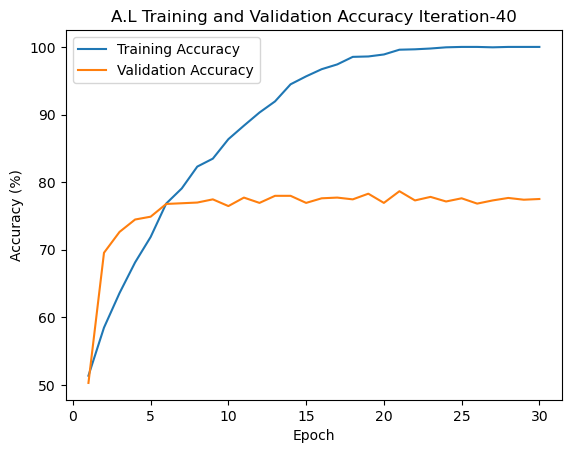

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 79.35%, POOL data F1 Score: 0.7934


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.76033490319205%
Test F1 Score: 0.7769028871391076

************Iteration Number 41****************
Number of images in dataset1: 1740
Number of images in dataset2: 13309


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.6551, Training Accuracy: 53.33%, Training F1 Score: 0.5273
Epoch [1/30], Val_acc: 51.39%, Validation F1 Score: 0.3808
Saved model with best validation accuracy: 51.39%
Epoch [2/30], Loss: 0.6511, Training Accuracy: 58.16%, Training F1 Score: 0.5769
Epoch [2/30], Val_acc: 67.50%, Validation F1 Score: 0.6651
Saved model with best validation accuracy: 67.50%
Epoch [3/30], Loss: 0.6412, Training Accuracy: 61.95%, Training F1 Score: 0.6127
Epoch [3/30], Val_acc: 75.41%, Validation F1 Score: 0.7539
Saved model with best validation accuracy: 75.41%
Epoch [4/30], Loss: 0.5955, Training Accuracy: 66.72%, Training F1 Score: 0.6668
Epoch [4/30], Val_acc: 76.61%, Validation F1 Score: 0.7661
Saved model with best validation accuracy: 76.61%
Epoch [5/30], Loss: 0.5732, Training Accuracy: 70.34%, Training F1 Score: 0.7012
Epoch [5/30], Val_acc: 77.81%, Validation F1 Score: 0.7781
Saved model with best validation accuracy: 77.81%
Epoch [6/30], Loss: 0.5264, Trai

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 79.78%, POOL data F1 Score: 0.7976


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.54526425954997%
Test F1 Score: 0.7823779193205944

************Iteration Number 42****************
Number of images in dataset1: 1780
Number of images in dataset2: 13264


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.6788, Training Accuracy: 53.88%, Training F1 Score: 0.5348
Epoch [1/30], Val_acc: 67.03%, Validation F1 Score: 0.6627
Saved model with best validation accuracy: 67.03%
Epoch [2/30], Loss: 0.6703, Training Accuracy: 63.20%, Training F1 Score: 0.6294
Epoch [2/30], Val_acc: 72.63%, Validation F1 Score: 0.7232
Saved model with best validation accuracy: 72.63%
Epoch [3/30], Loss: 0.6099, Training Accuracy: 64.89%, Training F1 Score: 0.6450
Epoch [3/30], Val_acc: 74.25%, Validation F1 Score: 0.7423
Saved model with best validation accuracy: 74.25%
Epoch [4/30], Loss: 0.6245, Training Accuracy: 68.76%, Training F1 Score: 0.6836
Epoch [4/30], Val_acc: 74.73%, Validation F1 Score: 0.7472
Saved model with best validation accuracy: 74.73%
Epoch [5/30], Loss: 0.5594, Training Accuracy: 71.74%, Training F1 Score: 0.7159
Epoch [5/30], Val_acc: 76.03%, Validation F1 Score: 0.7595
Saved model with best validation accuracy: 76.03%
Epoch [6/30], Loss: 0.5016, Trai

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 79.78%, POOL data F1 Score: 0.7977


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.02773417059132%
Test F1 Score: 0.7695538057742781

************Iteration Number 43****************
Number of images in dataset1: 1820
Number of images in dataset2: 13221
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.7616, Training Accuracy: 52.64%, Training F1 Score: 0.5239
Epoch [1/30], Val_acc: 53.53%, Validation F1 Score: 0.5001
Saved model with best validation accuracy: 53.53%
Epoch [2/30], Loss: 0.6671, Training Accuracy: 60.16%, Training F1 Score: 0.5963
Epoch [2/30], Val_acc: 68.97%, Validation F1 Score: 0.6847
Saved model with best validation accuracy: 68.97%
Epoch [3/30], Loss: 0.6015, Training Accuracy: 65.60%, Training F1 Score: 0.6543
Epoch [3/30], Val_acc: 72.68%, Validation F1 Score: 0.7220
Saved model with best validation accuracy: 72.68%
Epoch [4/30], Loss: 0.5143, Training Accuracy: 68.74%, Training F1 Score: 0.6856
Epoch [4/30], Val_acc: 75.61%, Validation F1 Score: 0.7560
Saved model with best validation accuracy: 75.61%
Epoch [5/30], Loss: 0.5936, Training Accuracy: 72.58%, Training F1 Score: 0.7231
Epoch [5/30], Val_acc: 76.24%, Validation F1 Score: 0.7609
Saved model with best validation accuracy: 76.24%
Epoch [6/30], Loss: 0.5536, Training Accuracy: 75.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.15%, POOL data F1 Score: 0.8015


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.96964939822082%
Test F1 Score: 0.7833247555326814

************Iteration Number 44****************
Number of images in dataset1: 1860
Number of images in dataset2: 13178
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.6872, Training Accuracy: 52.04%, Training F1 Score: 0.5201
Epoch [1/30], Val_acc: 55.57%, Validation F1 Score: 0.4738
Saved model with best validation accuracy: 55.57%
Epoch [2/30], Loss: 0.6540, Training Accuracy: 58.49%, Training F1 Score: 0.5826
Epoch [2/30], Val_acc: 68.55%, Validation F1 Score: 0.6676
Saved model with best validation accuracy: 68.55%
Epoch [3/30], Loss: 0.6125, Training Accuracy: 63.12%, Training F1 Score: 0.6285
Epoch [3/30], Val_acc: 75.25%, Validation F1 Score: 0.7523
Saved model with best validation accuracy: 75.25%
Epoch [4/30], Loss: 0.5888, Training Accuracy: 68.87%, Training F1 Score: 0.6847
Epoch [4/30], Val_acc: 75.56%, Validation F1 Score: 0.7549
Saved model with best validation accuracy: 75.56%
Epoch [5/30], Loss: 0.5764, Training Accuracy: 73.87%, Training F1 Score: 0.7385
Epoch [5/30], Val_acc: 76.92%, Validation F1 Score: 0.7691
Saved model with best validation accuracy: 76.92%
Epoch [6/30], Loss: 0.5081, Training Accuracy: 75.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.22%, POOL data F1 Score: 0.8021


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.3882783882784%
Test F1 Score: 0.7809018567639258

************Iteration Number 45****************
Number of images in dataset1: 1900
Number of images in dataset2: 13131


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.6727, Training Accuracy: 54.26%, Training F1 Score: 0.5392
Epoch [1/30], Val_acc: 69.86%, Validation F1 Score: 0.6959
Saved model with best validation accuracy: 69.86%
Epoch [2/30], Loss: 0.6645, Training Accuracy: 61.47%, Training F1 Score: 0.6126
Epoch [2/30], Val_acc: 73.31%, Validation F1 Score: 0.7329
Saved model with best validation accuracy: 73.31%
Epoch [3/30], Loss: 0.6834, Training Accuracy: 65.42%, Training F1 Score: 0.6530
Epoch [3/30], Val_acc: 73.52%, Validation F1 Score: 0.7315
Saved model with best validation accuracy: 73.52%
Epoch [4/30], Loss: 0.5795, Training Accuracy: 70.11%, Training F1 Score: 0.6980
Epoch [4/30], Val_acc: 77.86%, Validation F1 Score: 0.7785
Saved model with best validation accuracy: 77.86%
Epoch [5/30], Loss: 0.5466, Training Accuracy: 72.47%, Training F1 Score: 0.7229
Epoch [5/30], Val_acc: 76.92%, Validation F1 Score: 0.7688
Epoch [6/30], Loss: 0.5319, Training Accuracy: 75.84%, Training F1 Score: 0.7568
E

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.15%, POOL data F1 Score: 0.8012


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 79.06855049712192%
Test F1 Score: 0.7870074547390842

************Iteration Number 46****************
Number of images in dataset1: 1940
Number of images in dataset2: 13086
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.6391, Training Accuracy: 52.99%, Training F1 Score: 0.5246
Epoch [1/30], Val_acc: 70.91%, Validation F1 Score: 0.7090
Saved model with best validation accuracy: 70.91%
Epoch [2/30], Loss: 0.7366, Training Accuracy: 59.28%, Training F1 Score: 0.5866
Epoch [2/30], Val_acc: 74.88%, Validation F1 Score: 0.7487
Saved model with best validation accuracy: 74.88%
Epoch [3/30], Loss: 0.6714, Training Accuracy: 63.92%, Training F1 Score: 0.6376
Epoch [3/30], Val_acc: 75.88%, Validation F1 Score: 0.7588
Saved model with best validation accuracy: 75.88%
Epoch [4/30], Loss: 0.5821, Training Accuracy: 69.12%, Training F1 Score: 0.6891
Epoch [4/30], Val_acc: 77.03%, Validation F1 Score: 0.7703
Saved model with best validation accuracy: 77.03%
Epoch [5/30], Loss: 0.5842, Training Accuracy: 70.82%, Training F1 Score: 0.7067
Epoch [5/30], Val_acc: 75.30%, Validation F1 Score: 0.7478
Epoch [6/30], Loss: 0.5010, Training Accuracy: 74.18%, Training F1 Score: 0.7403
Epoch [6/30], Val_a

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.65%, POOL data F1 Score: 0.8064


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.85923600209314%
Test F1 Score: 0.7884816753926701

************Iteration Number 47****************
Number of images in dataset1: 1980
Number of images in dataset2: 13040
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.6929, Training Accuracy: 55.00%, Training F1 Score: 0.5480
Epoch [1/30], Val_acc: 59.81%, Validation F1 Score: 0.5887
Saved model with best validation accuracy: 59.81%
Epoch [2/30], Loss: 0.6761, Training Accuracy: 58.89%, Training F1 Score: 0.5859
Epoch [2/30], Val_acc: 69.44%, Validation F1 Score: 0.6893
Saved model with best validation accuracy: 69.44%
Epoch [3/30], Loss: 0.6574, Training Accuracy: 63.69%, Training F1 Score: 0.6360
Epoch [3/30], Val_acc: 75.41%, Validation F1 Score: 0.7538
Saved model with best validation accuracy: 75.41%
Epoch [4/30], Loss: 0.5597, Training Accuracy: 67.42%, Training F1 Score: 0.6713
Epoch [4/30], Val_acc: 76.40%, Validation F1 Score: 0.7638
Saved model with best validation accuracy: 76.40%
Epoch [5/30], Loss: 0.5402, Training Accuracy: 69.19%, Training F1 Score: 0.6907
Epoch [5/30], Val_acc: 77.34%, Validation F1 Score: 0.7734
Saved model with best validation accuracy: 77.34%
Epoch [6/30], Loss: 0.4820, Training Accuracy: 73.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.43%, POOL data F1 Score: 0.8042


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.44636316064887%
Test F1 Score: 0.7754038561750912

************Iteration Number 48****************
Number of images in dataset1: 2020
Number of images in dataset2: 12993


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.6983, Training Accuracy: 51.93%, Training F1 Score: 0.5178
Epoch [1/30], Val_acc: 60.70%, Validation F1 Score: 0.5789
Saved model with best validation accuracy: 60.70%
Epoch [2/30], Loss: 0.6555, Training Accuracy: 58.96%, Training F1 Score: 0.5816
Epoch [2/30], Val_acc: 73.10%, Validation F1 Score: 0.7278
Saved model with best validation accuracy: 73.10%
Epoch [3/30], Loss: 0.6393, Training Accuracy: 65.79%, Training F1 Score: 0.6559
Epoch [3/30], Val_acc: 76.56%, Validation F1 Score: 0.7647
Saved model with best validation accuracy: 76.56%
Epoch [4/30], Loss: 0.5717, Training Accuracy: 68.66%, Training F1 Score: 0.6843
Epoch [4/30], Val_acc: 75.77%, Validation F1 Score: 0.7553
Epoch [5/30], Loss: 0.5449, Training Accuracy: 73.37%, Training F1 Score: 0.7312
Epoch [5/30], Val_acc: 78.02%, Validation F1 Score: 0.7800
Saved model with best validation accuracy: 78.02%
Epoch [6/30], Loss: 0.4868, Training Accuracy: 76.34%, Training F1 Score: 0.7625
E

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.37%, POOL data F1 Score: 0.8034


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.49293563579278%
Test F1 Score: 0.7798607391537226

************Iteration Number 49****************
Number of images in dataset1: 2060
Number of images in dataset2: 12942
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.6849, Training Accuracy: 48.50%, Training F1 Score: 0.4776
Epoch [1/30], Val_acc: 68.03%, Validation F1 Score: 0.6785
Saved model with best validation accuracy: 68.03%
Epoch [2/30], Loss: 0.8088, Training Accuracy: 60.44%, Training F1 Score: 0.6006
Epoch [2/30], Val_acc: 73.47%, Validation F1 Score: 0.7346
Saved model with best validation accuracy: 73.47%
Epoch [3/30], Loss: 0.6907, Training Accuracy: 63.69%, Training F1 Score: 0.6353
Epoch [3/30], Val_acc: 73.84%, Validation F1 Score: 0.7351
Saved model with best validation accuracy: 73.84%
Epoch [4/30], Loss: 0.5492, Training Accuracy: 67.23%, Training F1 Score: 0.6678
Epoch [4/30], Val_acc: 75.67%, Validation F1 Score: 0.7566
Saved model with best validation accuracy: 75.67%
Epoch [5/30], Loss: 0.5595, Training Accuracy: 71.55%, Training F1 Score: 0.7138
Epoch [5/30], Val_acc: 77.18%, Validation F1 Score: 0.7717
Saved model with best validation accuracy: 77.18%
Epoch [6/30], Loss: 0.5673, Training Accuracy: 73.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.12%, POOL data F1 Score: 0.8012


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.1789638932496%
Test F1 Score: 0.788002033553635

************Iteration Number 50****************
Number of images in dataset1: 2100
Number of images in dataset2: 12898


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.6553, Training Accuracy: 53.76%, Training F1 Score: 0.5332
Epoch [1/30], Val_acc: 67.92%, Validation F1 Score: 0.6786
Saved model with best validation accuracy: 67.92%
Epoch [2/30], Loss: 0.5946, Training Accuracy: 60.86%, Training F1 Score: 0.5997
Epoch [2/30], Val_acc: 69.28%, Validation F1 Score: 0.6872
Saved model with best validation accuracy: 69.28%
Epoch [3/30], Loss: 0.6652, Training Accuracy: 61.67%, Training F1 Score: 0.6164
Epoch [3/30], Val_acc: 74.46%, Validation F1 Score: 0.7445
Saved model with best validation accuracy: 74.46%
Epoch [4/30], Loss: 0.6077, Training Accuracy: 67.67%, Training F1 Score: 0.6736
Epoch [4/30], Val_acc: 76.03%, Validation F1 Score: 0.7596
Saved model with best validation accuracy: 76.03%
Epoch [5/30], Loss: 0.6152, Training Accuracy: 70.57%, Training F1 Score: 0.7036
Epoch [5/30], Val_acc: 75.82%, Validation F1 Score: 0.7570
Epoch [6/30], Loss: 0.4713, Training Accuracy: 73.38%, Training F1 Score: 0.7321
E

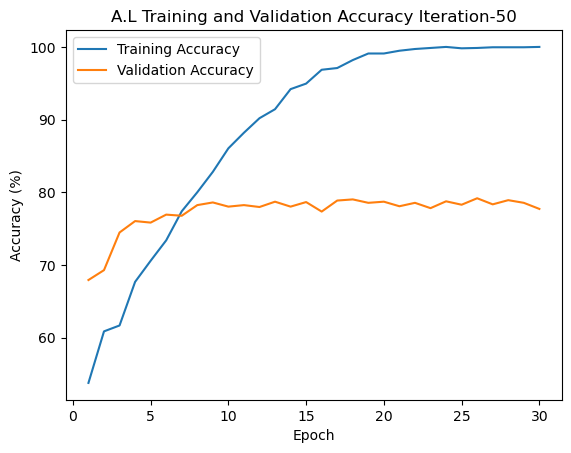

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.83%, POOL data F1 Score: 0.8081


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.86499215070644%
Test F1 Score: 0.7784180199057097

************Iteration Number 51****************
Number of images in dataset1: 2140
Number of images in dataset2: 12851


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.7081, Training Accuracy: 54.02%, Training F1 Score: 0.5373
Epoch [1/30], Val_acc: 65.78%, Validation F1 Score: 0.6366
Saved model with best validation accuracy: 65.78%
Epoch [2/30], Loss: 0.6840, Training Accuracy: 60.19%, Training F1 Score: 0.5990
Epoch [2/30], Val_acc: 74.73%, Validation F1 Score: 0.7470
Saved model with best validation accuracy: 74.73%
Epoch [3/30], Loss: 0.6168, Training Accuracy: 63.36%, Training F1 Score: 0.6309
Epoch [3/30], Val_acc: 77.08%, Validation F1 Score: 0.7707
Saved model with best validation accuracy: 77.08%
Epoch [4/30], Loss: 0.6122, Training Accuracy: 69.95%, Training F1 Score: 0.6973
Epoch [4/30], Val_acc: 77.03%, Validation F1 Score: 0.7698
Epoch [5/30], Loss: 0.5618, Training Accuracy: 73.04%, Training F1 Score: 0.7279
Epoch [5/30], Val_acc: 77.03%, Validation F1 Score: 0.7702
Epoch [6/30], Loss: 0.5583, Training Accuracy: 75.98%, Training F1 Score: 0.7590
Epoch [6/30], Val_acc: 78.02%, Validation F1 Score:

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.38%, POOL data F1 Score: 0.8033


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.44060701203558%
Test F1 Score: 0.7760869565217392

************Iteration Number 52****************
Number of images in dataset1: 2180
Number of images in dataset2: 12810
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.5786, Training Accuracy: 54.08%, Training F1 Score: 0.5331
Epoch [1/30], Val_acc: 65.99%, Validation F1 Score: 0.6580
Saved model with best validation accuracy: 65.99%
Epoch [2/30], Loss: 0.7918, Training Accuracy: 58.85%, Training F1 Score: 0.5882
Epoch [2/30], Val_acc: 72.27%, Validation F1 Score: 0.7224
Saved model with best validation accuracy: 72.27%
Epoch [3/30], Loss: 0.4554, Training Accuracy: 61.93%, Training F1 Score: 0.6161
Epoch [3/30], Val_acc: 74.62%, Validation F1 Score: 0.7447
Saved model with best validation accuracy: 74.62%
Epoch [4/30], Loss: 0.3328, Training Accuracy: 66.56%, Training F1 Score: 0.6638
Epoch [4/30], Val_acc: 74.83%, Validation F1 Score: 0.7469
Saved model with best validation accuracy: 74.83%
Epoch [5/30], Loss: 0.5562, Training Accuracy: 68.72%, Training F1 Score: 0.6840
Epoch [5/30], Val_acc: 75.93%, Validation F1 Score: 0.7571
Saved model with best validation accuracy: 75.93%
Epoch [6/30], Loss: 0.6058, Training Accuracy: 70.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.69%, POOL data F1 Score: 0.8069


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.44636316064887%
Test F1 Score: 0.7830900855561148

************Iteration Number 53****************
Number of images in dataset1: 2220
Number of images in dataset2: 12768


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.6463, Training Accuracy: 52.16%, Training F1 Score: 0.5163
Epoch [1/30], Val_acc: 58.14%, Validation F1 Score: 0.5403
Saved model with best validation accuracy: 58.14%
Epoch [2/30], Loss: 0.6358, Training Accuracy: 60.86%, Training F1 Score: 0.6053
Epoch [2/30], Val_acc: 74.62%, Validation F1 Score: 0.7455
Saved model with best validation accuracy: 74.62%
Epoch [3/30], Loss: 0.6238, Training Accuracy: 64.73%, Training F1 Score: 0.6441
Epoch [3/30], Val_acc: 75.46%, Validation F1 Score: 0.7533
Saved model with best validation accuracy: 75.46%
Epoch [4/30], Loss: 0.7264, Training Accuracy: 69.01%, Training F1 Score: 0.6889
Epoch [4/30], Val_acc: 78.34%, Validation F1 Score: 0.7834
Saved model with best validation accuracy: 78.34%
Epoch [5/30], Loss: 0.5898, Training Accuracy: 70.81%, Training F1 Score: 0.7045
Epoch [5/30], Val_acc: 77.45%, Validation F1 Score: 0.7743
Epoch [6/30], Loss: 0.6152, Training Accuracy: 71.76%, Training F1 Score: 0.7167
E

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 81.52%, POOL data F1 Score: 0.8147


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.75457875457876%
Test F1 Score: 0.7805405405405406

************Iteration Number 54****************
Number of images in dataset1: 2260
Number of images in dataset2: 12723
lrrrrrrrrrr
0.001


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 0.6856, Training Accuracy: 51.33%, Training F1 Score: 0.5094
Epoch [1/30], Val_acc: 68.71%, Validation F1 Score: 0.6864
Saved model with best validation accuracy: 68.71%
Epoch [2/30], Loss: 0.7179, Training Accuracy: 60.80%, Training F1 Score: 0.6021
Epoch [2/30], Val_acc: 73.99%, Validation F1 Score: 0.7399
Saved model with best validation accuracy: 73.99%
Epoch [3/30], Loss: 0.6406, Training Accuracy: 65.31%, Training F1 Score: 0.6513
Epoch [3/30], Val_acc: 75.61%, Validation F1 Score: 0.7535
Saved model with best validation accuracy: 75.61%
Epoch [4/30], Loss: 0.5587, Training Accuracy: 69.38%, Training F1 Score: 0.6910
Epoch [4/30], Val_acc: 77.55%, Validation F1 Score: 0.7751
Saved model with best validation accuracy: 77.55%
Epoch [5/30], Loss: 0.5691, Training Accuracy: 71.42%, Training F1 Score: 0.7105
Epoch [5/30], Val_acc: 78.49%, Validation F1 Score: 0.7848
Saved model with best validation accuracy: 78.49%
Epoch [6/30], Loss: 0.5854, Training Accuracy: 75.

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.98%, POOL data F1 Score: 0.8095


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 79.12087912087912%
Test F1 Score: 0.7874267448055408

************Iteration Number 55****************
Number of images in dataset1: 2300
Number of images in dataset2: 12673


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.7062, Training Accuracy: 54.52%, Training F1 Score: 0.5418
Epoch [1/30], Val_acc: 60.91%, Validation F1 Score: 0.5638
Saved model with best validation accuracy: 60.91%
Epoch [2/30], Loss: 0.6572, Training Accuracy: 61.22%, Training F1 Score: 0.6070
Epoch [2/30], Val_acc: 74.93%, Validation F1 Score: 0.7490
Saved model with best validation accuracy: 74.93%
Epoch [3/30], Loss: 0.5964, Training Accuracy: 64.87%, Training F1 Score: 0.6454
Epoch [3/30], Val_acc: 75.82%, Validation F1 Score: 0.7582
Saved model with best validation accuracy: 75.82%
Epoch [4/30], Loss: 0.6397, Training Accuracy: 68.04%, Training F1 Score: 0.6761
Epoch [4/30], Val_acc: 77.39%, Validation F1 Score: 0.7738
Saved model with best validation accuracy: 77.39%
Epoch [5/30], Loss: 0.5595, Training Accuracy: 70.83%, Training F1 Score: 0.7072
Epoch [5/30], Val_acc: 77.18%, Validation F1 Score: 0.7718
Epoch [6/30], Loss: 0.5384, Training Accuracy: 74.09%, Training F1 Score: 0.7391
E

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 81.30%, POOL data F1 Score: 0.8127


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 79.2255363683935%
Test F1 Score: 0.7898358920063526

************Iteration Number 56****************
Number of images in dataset1: 2340
Number of images in dataset2: 12628


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.6923, Training Accuracy: 52.61%, Training F1 Score: 0.5260
Epoch [1/30], Val_acc: 68.66%, Validation F1 Score: 0.6780
Saved model with best validation accuracy: 68.66%
Epoch [2/30], Loss: 0.7419, Training Accuracy: 57.86%, Training F1 Score: 0.5676
Epoch [2/30], Val_acc: 76.03%, Validation F1 Score: 0.7602
Saved model with best validation accuracy: 76.03%
Epoch [3/30], Loss: 0.4996, Training Accuracy: 66.11%, Training F1 Score: 0.6607
Epoch [3/30], Val_acc: 75.14%, Validation F1 Score: 0.7502
Epoch [4/30], Loss: 0.6060, Training Accuracy: 68.97%, Training F1 Score: 0.6862
Epoch [4/30], Val_acc: 76.30%, Validation F1 Score: 0.7614
Saved model with best validation accuracy: 76.30%
Epoch [5/30], Loss: 0.6712, Training Accuracy: 71.92%, Training F1 Score: 0.7169
Epoch [5/30], Val_acc: 78.28%, Validation F1 Score: 0.7819
Saved model with best validation accuracy: 78.28%
Epoch [6/30], Loss: 0.6894, Training Accuracy: 76.67%, Training F1 Score: 0.7643
E

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.68%, POOL data F1 Score: 0.8066


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 78.02197802197803%
Test F1 Score: 0.7933070866141734

************Iteration Number 57****************
Number of images in dataset1: 2380
Number of images in dataset2: 12587


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.7839, Training Accuracy: 52.77%, Training F1 Score: 0.5258
Epoch [1/30], Val_acc: 50.92%, Validation F1 Score: 0.3751
Saved model with best validation accuracy: 50.92%
Epoch [2/30], Loss: 0.6592, Training Accuracy: 60.34%, Training F1 Score: 0.5999
Epoch [2/30], Val_acc: 67.09%, Validation F1 Score: 0.6487
Saved model with best validation accuracy: 67.09%
Epoch [3/30], Loss: 0.6586, Training Accuracy: 64.37%, Training F1 Score: 0.6396
Epoch [3/30], Val_acc: 75.72%, Validation F1 Score: 0.7571
Saved model with best validation accuracy: 75.72%
Epoch [4/30], Loss: 0.5564, Training Accuracy: 66.22%, Training F1 Score: 0.6604
Epoch [4/30], Val_acc: 76.03%, Validation F1 Score: 0.7594
Saved model with best validation accuracy: 76.03%
Epoch [5/30], Loss: 0.5730, Training Accuracy: 70.46%, Training F1 Score: 0.7018
Epoch [5/30], Val_acc: 77.24%, Validation F1 Score: 0.7723
Saved model with best validation accuracy: 77.24%
Epoch [6/30], Loss: 0.5308, Trai

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.73%, POOL data F1 Score: 0.8070


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.34170591313449%
Test F1 Score: 0.7690666666666666

************Iteration Number 58****************
Number of images in dataset1: 2420
Number of images in dataset2: 12540


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.6626, Training Accuracy: 54.79%, Training F1 Score: 0.5455
Epoch [1/30], Val_acc: 71.32%, Validation F1 Score: 0.7114
Saved model with best validation accuracy: 71.32%
Epoch [2/30], Loss: 0.6307, Training Accuracy: 60.33%, Training F1 Score: 0.5993
Epoch [2/30], Val_acc: 75.25%, Validation F1 Score: 0.7525
Saved model with best validation accuracy: 75.25%
Epoch [3/30], Loss: 0.5961, Training Accuracy: 65.58%, Training F1 Score: 0.6513
Epoch [3/30], Val_acc: 76.92%, Validation F1 Score: 0.7689
Saved model with best validation accuracy: 76.92%
Epoch [4/30], Loss: 0.5712, Training Accuracy: 68.72%, Training F1 Score: 0.6849
Epoch [4/30], Val_acc: 76.50%, Validation F1 Score: 0.7650
Epoch [5/30], Loss: 0.5700, Training Accuracy: 71.28%, Training F1 Score: 0.7113
Epoch [5/30], Val_acc: 77.18%, Validation F1 Score: 0.7711
Saved model with best validation accuracy: 77.18%
Epoch [6/30], Loss: 0.5394, Training Accuracy: 74.55%, Training F1 Score: 0.7430
E

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.24%, POOL data F1 Score: 0.8018


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 77.70800627943485%
Test F1 Score: 0.7689804772234274

************Iteration Number 59****************
Number of images in dataset1: 2460
Number of images in dataset2: 12491


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


lrrrrrrrrrr
0.001
Epoch [1/30], Loss: 0.6209, Training Accuracy: 53.94%, Training F1 Score: 0.5326
Epoch [1/30], Val_acc: 68.86%, Validation F1 Score: 0.6869
Saved model with best validation accuracy: 68.86%
Epoch [2/30], Loss: 0.6405, Training Accuracy: 61.54%, Training F1 Score: 0.6140
Epoch [2/30], Val_acc: 72.74%, Validation F1 Score: 0.7211
Saved model with best validation accuracy: 72.74%
Epoch [3/30], Loss: 0.6005, Training Accuracy: 65.41%, Training F1 Score: 0.6513
Epoch [3/30], Val_acc: 75.61%, Validation F1 Score: 0.7542
Saved model with best validation accuracy: 75.61%
Epoch [4/30], Loss: 0.6482, Training Accuracy: 67.76%, Training F1 Score: 0.6752
Epoch [4/30], Val_acc: 76.71%, Validation F1 Score: 0.7665
Saved model with best validation accuracy: 76.71%
Epoch [5/30], Loss: 0.5865, Training Accuracy: 73.13%, Training F1 Score: 0.7287
Epoch [5/30], Val_acc: 77.55%, Validation F1 Score: 0.7755
Saved model with best validation accuracy: 77.55%
Epoch [6/30], Loss: 0.4971, Trai

/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



*************


POOL data: 80.95%, POOL data F1 Score: 0.8091


/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shrivastavaayush/.conda/envs/Ayush/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Test Accuracy: 79.48717948717949%
Test F1 Score: 0.7925925925925926


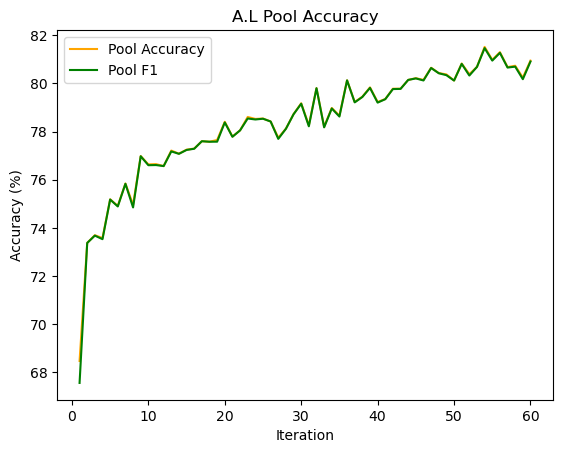

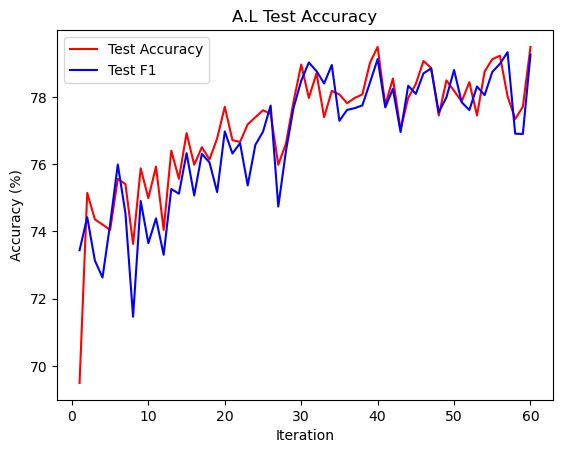

In [22]:
# def hyp(lrr,epoc,temp_data,seen_indices): 
file_no = 60
lrr=0.001
num_epochs = 30
temp_data = []  
seen_indices = set() 
pool_acc_history = []
pool_f1_history = []
test_acc_history = []
test_f1_history = []

save_dir_2 = f'/home/shrivastavaayush/VS_dir/Nav/ACL2/Best_pool_acc/'
os.makedirs(save_dir_2, exist_ok=True)
model_fi = 'Best_POOL_model.pth'
# Combine the directory and filename
best_POOL_PATH = os.path.join(save_dir_2, model_fi)
best_POOL_acc = 0.0

# for i in lrr:
for i in range(file_no):
    print(f"\n************Iteration Number {i}****************")

    num_images_dataset1 = len(subset1.image_paths)
    print("Number of images in dataset1:", num_images_dataset1,end="\n")
    
    num_images_dataset2 = len(subset2.image_paths)
    print("Number of images in dataset2:", num_images_dataset2,end="\n")
    
    subset_train_loader = DataLoader(subset1, batch_size=128, shuffle=True)
    remaining_train_loader = DataLoader(subset2, batch_size=128, shuffle=True)

    model = get_model(2)

    # optimizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.9, weight_decay=0.01)
    optimizer = optim.SGD(model.parameters(), lr=lrr,momentum=0.9, weight_decay=0.01)

    # Define the loss function
    criterion = nn.CrossEntropyLoss()
    best_val_acc = 0.0
    save_dir = f'/home/shrivastavaayush/VS_dir/Nav/ACL2/Best_val_acc/'
    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Define the filename for the model
    model_filename = 'best_Val_model.pth'
    # Combine the directory and filename
    best_model_path = os.path.join(save_dir, model_filename)
    print('lrrrrrrrrrr')
    print(lrr,end='\n')
    train_acc_history = []
    val_acc_history = []    

# *****************************************************************************************************************************************

    for epoch in range(num_epochs):
        model.train()
        total_correct = 0
        total_samples = 0
        train_predictions = []
        train_targets = []

            
        for images, labels, path in subset_train_loader:
            images, labels  = images.to(Device), labels.to(Device)  # Move data to GPU
            optimizer.zero_grad()
            outputs = model(images)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(outputs, 1)
            train_predictions.extend(predicted.cpu().numpy())
            train_targets.extend(labels.cpu().numpy())
            
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        train_accuracy = 100 * total_correct / total_samples
        train_acc_history.append(train_accuracy)
        train_f1 = f1_score(train_targets, train_predictions, average='macro')
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.2f}%, Training F1 Score: {train_f1:.4f}')


        # Validation
        model.eval()
        val_cor = 0
        val_totl = 0
        val_predictions = []
        val_targets = []
        with torch.no_grad():
            for images, labels, path in val_loader:
                images, labels = images.to(Device), labels.to(Device)
                outputs = model(images)
                probabilities = nn.functional.softmax(outputs, dim=1)
                _, predicted = torch.max(probabilities, 1)
                val_predictions.extend(predicted.cpu().numpy())
                val_targets.extend(labels.cpu().numpy())
                val_cor += (predicted == labels).sum().item()
                val_totl += labels.size(0)
        val_acc = 100 * val_cor / val_totl
        val_acc_history.append(val_acc)
        val_f1 = f1_score(val_targets, val_predictions, average='macro')
        print(f'Epoch [{epoch+1}/{num_epochs}], Val_acc: {val_acc:.2f}%, Validation F1 Score: {val_f1:.4f}')    
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), best_model_path)
            print(f'Saved model with best validation accuracy: {best_val_acc:.2f}%',end="\n")
        
    if(i%10 == 0 or i==0):
        plt.plot(range(1, num_epochs + 1), train_acc_history, label='Training Accuracy')
        plt.plot(range(1, num_epochs + 1), val_acc_history, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title(f'A.L Training and Validation Accuracy Iteration-{i}')
        plt.legend()
        plt.show()



#   **********************************************************************************************************************************
    # Pool
    best_model = models.resnet18(pretrained=False)
    num_features = best_model.fc.in_features
    best_model.fc = nn.Linear(num_features, 2)
    best_model.load_state_dict(torch.load('/home/shrivastavaayush/VS_dir/Nav/ACL2/Best_val_acc/best_Val_model.pth'))
    best_model = best_model.to(Device)
    best_model.eval()
    pool_cor = 0
    pool_totl = 0
    pool_predictions = []
    pool_targets = []
    
    with torch.no_grad():
        count=0
        all_images, all_lables, all_probs, all_path = [], [], [], []
        for images, labels, path in remaining_train_loader:
            path = list(path)
            images, labels = images.to(Device), labels.to(Device)
            outputs = best_model(images)
            probabilities = nn.functional.softmax(outputs, dim=1)
            _, predicted = torch.max(probabilities, 1) 
            probabilities = probabilities.tolist()
            # print(images.shape, labels.shape, path, probabilities)
            all_path.extend(path)
            # all_images.extend(images.tolist())
            all_lables.extend(labels.detach().cpu().tolist())
            all_probs.extend(probabilities)
            # print(all_probs)

            pool_predictions.extend(predicted.cpu().numpy())
            pool_targets.extend(labels.cpu().numpy())
            pool_cor += (predicted == labels).sum().item()
            pool_totl += labels.size(0)


        # differences = [(abs(prob[1] - 0.5), image, label) for prob, image, label in zip(all_probs, all_images, all_lables)]
        # differences = [(abs(prob[0] - 0.5), image, label,path) if label == 0 else (abs(prob[1] - 0.5), image, label,path) for prob, image, label, path in zip(all_probs, all_images, all_lables, all_path)]
        differences = [(abs(prob[0] - 0.5),  label,path) if label == 0 else (abs(prob[1] - 0.5),  label,path) for prob,  label, path in zip(all_probs,  all_lables, all_path)]

        sorted_data = sorted(differences, key=lambda x: x[0])
        # most_confused = get_confused_data(sorted_data,8)  # return a list of size 8(images) of tuple containing (probabilities, images, labels)
        most_confused = sorted_data[:40]

        subset1.add_selected_images(most_confused)
        subset2.remove_selected_images(most_confused)

        pool_acc = 100 * pool_cor / pool_totl
        pool_acc_history.append(pool_acc)

        pool_f1 = f1_score(pool_targets, pool_predictions, average='macro')


        print("\n*************\n")
        print(f'\nPOOL data: {pool_acc:.2f}%, POOL data F1 Score: {pool_f1:.4f}')
        
        pool_f1 = pool_f1*100
        pool_f1_history.append(pool_f1)
        
        # print(f'\n***{count}***\n')




#   ************************************************TEST**********************************************************************************
    best_model = models.resnet18(pretrained=False)
    num_features = best_model.fc.in_features
    best_model.fc = nn.Linear(num_features, 2)
    best_model.load_state_dict(torch.load('/home/shrivastavaayush/VS_dir/Nav/ACL2/Best_val_acc/best_Val_model.pth'))
    best_model = best_model.to(Device)
    best_model.eval()
    correct = 0
    total = 0
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for images, labels, path in test_loader:
            images, labels = images.to(Device), labels.to(Device)  # Move data to GPU
            outputs = best_model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

        accuracy = 100 * correct / total
        test_acc_history.append(accuracy)
        # Calculate F1 score
        f1 = f1_score(true_labels, predicted_labels)

        print(f"Test Accuracy: {accuracy}%")
        print(f"Test F1 Score: {f1}")
        f1 = f1*100
        test_f1_history.append(f1)

        if accuracy > best_POOL_acc:
            best_POOL_acc = accuracy
            torch.save(best_model.state_dict(), best_POOL_PATH)
            print(f'Saved model with best Test accuracy: {best_POOL_acc:.2f}%',end="\n")





# plt.figure(figsize=(8, 6))
plt.plot(range(1, file_no + 1), pool_acc_history, label='Pool Accuracy', color='orange')
plt.plot(range(1, file_no + 1), pool_f1_history, label='Pool F1', color='green')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('A.L Pool Accuracy')
plt.legend()
plt.show()

# Plot for Test Accuracy
# plt.figure(figsize=(8, 6))
plt.plot(range(1, file_no + 1), test_acc_history, label='Test Accuracy', color='red')
plt.plot(range(1, file_no + 1), test_f1_history, label='Test F1', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('A.L Test Accuracy')
plt.legend()
plt.show()
        
    
torch.cuda.empty_cache()
del model


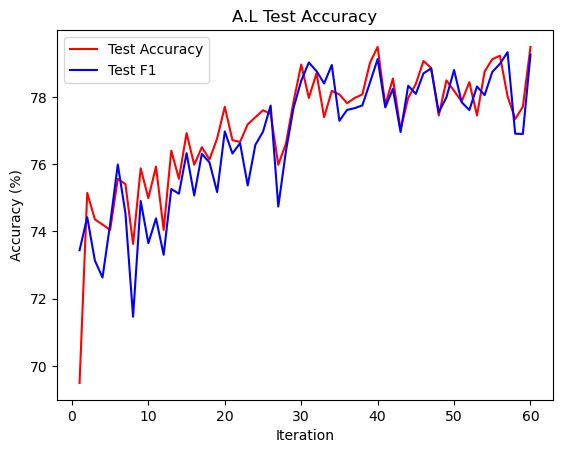

In [31]:
plt.plot(range(1, file_no + 1), test_acc_history, label='Test Accuracy', color='red')
plt.plot(range(1, file_no + 1), test_f1_history, label='Test F1', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('A.L Test Accuracy')
plt.legend()

plt.show()